### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

**Date** 26/Apr/2024

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: (Multiple) Linear Regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Assignment Execution

**Load and Explore the Data**
* Creation of a new DataFrame and initial data exploration.
* Handling missing values and summarising descriptive statistics.

**Data Preprocessing**
* Removal of redundant columns and renaming headers for better referencing.
* Saving a clean copy of the DataFrame as a CSV file.

**Linear Regression Analysis**
* Utilising linear regression to explore relationships between loyalty points <br>
and age/remuneration/spending scores.
* Model creation, evaluation, and interpretation.
* Visualisation of regression results.

**Insights and Observations**
* Reflections on the analysis and its implications for Turtle Games' marketing strategy.


## 1. Load and explore the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error, r2_score

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
import warnings

In [2]:
# Load the CSV file(s) as reviews
turtle_reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame
turtle_reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Checking for missing values using isna() instead of fillna()
# because fillna() could actually be disruptive if no NaN or NA present
turtle_reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data
turtle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Converting 'gender' and 'education'
categorical_columns = ['gender', 'education']
turtle_reviews[categorical_columns] = turtle_reviews[categorical_columns].astype('category')

In [6]:
# Basic descriptive statistics
turtle_reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [7]:
turtle_reviews.shape

(2000, 11)

## 2. Drop columns

In [8]:
# Define variable
col_names = list(turtle_reviews)

# Call variable
col_names

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'language',
 'platform',
 'product',
 'review',
 'summary']

In [9]:
# Create a copy of the DataFrame
turtle = turtle_reviews.copy()

## 3. Rename columns

In [10]:
# Find unique values in 'education'
edu_unique = turtle['education'].unique().tolist()
edu_unique

['graduate', 'PhD', 'diploma', 'postgraduate', 'Basic']

In [11]:
# Correct spelling in 'education'
# Replace 'Basic' with 'basic' in the 'education' column
turtle['education'] = turtle['education'].replace('Basic', 'basic')

In [12]:
# Rename the column headers
turtle = turtle.rename(columns={'remuneration (k£)': 'remuneration',
                               'spending_score (1-100)': 'spending_score'})

# View column names
turtle.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

  language platform  product  \
0       EN      Web      453   
1       EN      Web      466   
2       EN      Web      254   
3       EN      Web      263   
4       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## Save the DataFrame as a CSV file

In [13]:
# Define variable
col_names_2 = list(turtle)

# Call variable
#col_names_2

In [14]:
# Create a CSV file as output
turtle_new = pd.DataFrame(turtle, columns=['gender',
 'age',
 'remuneration',
 'spending_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary'])

#turtle_new.to_csv('turtle_new.csv', index=False)

In [15]:
# Import new CSV file with Pandas
turtle_new = pd.read_csv('turtle_new.csv')

# View DataFrame
turtle_new.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [16]:
turtle_new.describe()

age  remuneration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000

In [ ]:
#turtle_new.info()

## 4. Correlation Pairplot: Investigate Data Distribution


C:\Users\cinde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


loyalty_points       age  remuneration  spending_score
loyalty_points        1.000000 -0.042445      0.616065        0.672310
age                  -0.042445  1.000000     -0.005708       -0.224334
remuneration          0.616065 -0.005708      1.000000        0.005612
spending_score        0.672310 -0.224334      0.005612        1.000000

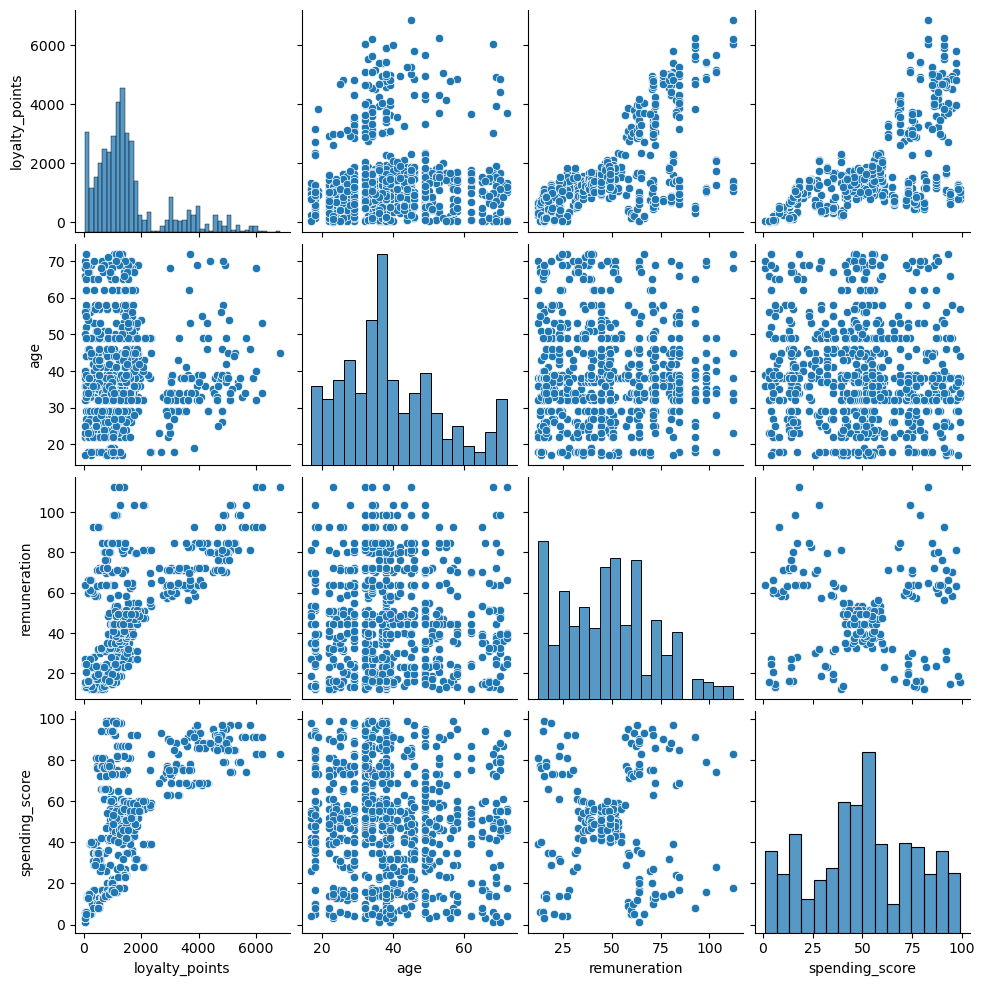

In [17]:
# Create pairplots to double-check relationships
corr_pairplot = turtle_new[['loyalty_points','age',
                            'remuneration','spending_score']]

sns.pairplot(corr_pairplot,
             vars=corr_pairplot,
             diag_kind= 'hist')

# Check the correlation of the variables
corr_pairplot.corr()

### Notes:

**Loyalty Points:**
* moderate positive correlation with remuneration and spending score (correlation coefficients around 0.6)
* correlation with age seems weak and potentially slightly negative (coefficient close to 0)
    
**Age:**
* weak negative correlation between age and loyalty points - older customers might have slightly lower loyalty points on average
* However, the coefficient is close to zero, so the relationship might not be significant
* There seems to be no clear correlation between age and remuneration or spending score

**Remuneration:**
* moderate positive correlation with loyalty points 
* a weak positive correlation with spending score


**Spending Score:**
* Spending score has a moderate positive correlation with loyalty points

## 4.1 EDA: Gender and Education

Both 'gender' and 'education' are not directly included in assignment queries, <br>
including them here for complete EDA, and to have a reference point for further analysis, <br>
if needed later.

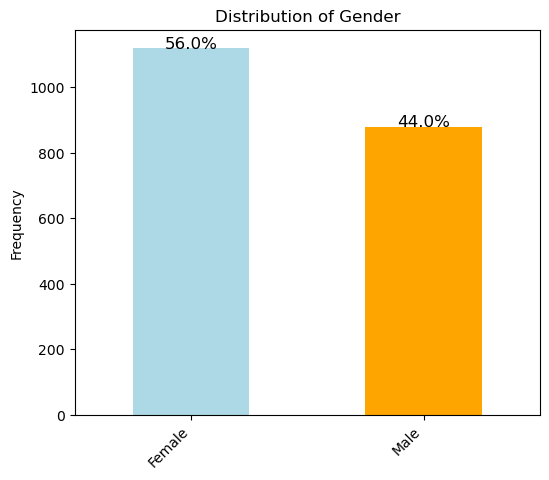

In [18]:
# Gender distribution
# Count occurrences of each gender
gender_counts = turtle_new['gender'].value_counts()

# Calculate percentages
total_customers = len(turtle_new)
percentages = (gender_counts / total_customers) * 100  

# Create the plot
plt.figure(figsize=(6, 5))  # Adjust figure size as needed
gender_counts.plot(kind='bar', color=['lightblue', 'orange'])

    
# Loop through bars and display percentages
for bar, percentage in zip(plt.gca().patches, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f"{percentage:.1f}%", ha='center', fontsize=12)
    
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
gender_counts

gender
Female    1120
Male       880
Name: count, dtype: int64

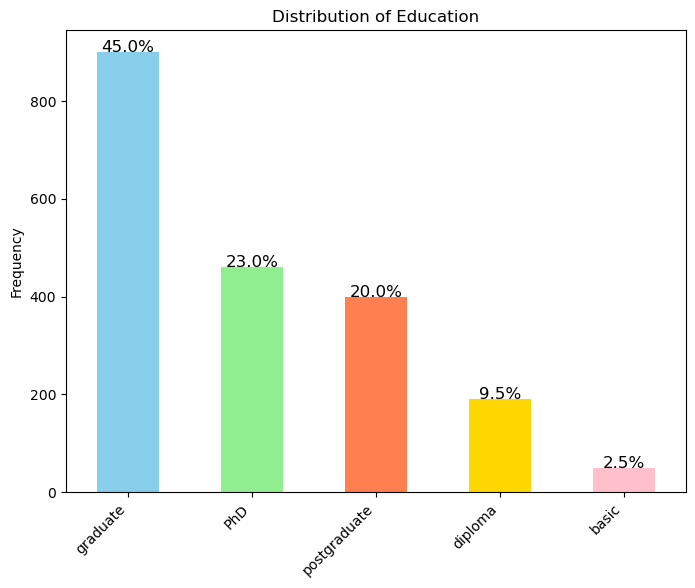

In [20]:
# Education distribution
# Count occurrences of each level of education
edu_counts = turtle_new['education'].value_counts()

# Calculate percentages
total_customers = len(turtle_new)
edu_percentages = (edu_counts / total_customers) * 100  

# Define colours
colors = ['skyblue', 'lightgreen', 'coral', 'gold', 'pink']

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
edu_counts.plot(kind='bar', color=colors)

    
# Loop through bars and display percentages
num_bars = min(len(plt.gca().patches), len(edu_percentages))
for bar, percentage in zip(plt.gca().patches[:num_bars], edu_percentages[:num_bars]):\
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f"{percentage:.1f}%", ha='center', fontsize=12)
    
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Distribution of Education')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
edu_counts

education
graduate        900
PhD             460
postgraduate    400
diploma         190
basic            50
Name: count, dtype: int64

## Observations

**Customer demographics**

* Gender distribution is slightly skewed towards females (56% female, 44% male). <br> Given that n=2000, this is within acceptable parameters and does not require further action at this point.
* Education levels are varied, with the highest representation in graduate degrees (45%) followed by PhD (23%),<br> postgraduate (20%), diploma (9.5%), and basic education (2.5%).

**Data cleaning**

* Basic data cleaning steps were applied, including correcting a typo in the 'education' column <br> 
and renaming columns for clarity.

## 5. Linear regression

### 5a) Spending Score vs Loyalty Points

In [22]:
# Define independent variable/predictor
X1 = turtle_new['spending_score']

# Define dependent variable/response
y1 = turtle_new['loyalty_points']

# Check for linearity
#plt.scatter(X1, y1)

In [23]:
# Create formula and pass through OLS method
f1 = 'y1 ~ X1'
model1 = ols(f1, data = turtle_new).fit()

# Print the regression table
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          2.92e-263
Time:                        16:32:59   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X1            33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Extract the estimated parameters
estimated_spending = model1.params
print('Estimated Parameters for Spend vs Loyalty:')
print(estimated_spending)

# Extract the standard errors
std_err_spending = model1.bse
print('Standard Errors for Spend vs Loyalty')
print(std_err_spending)

# Extract the predicted values
predicted_spending = model1.predict()
print('Predicted Values for Spend vs Loyalty')
print(predicted_spending)

Estimated Parameters for Spend vs Loyalty:
Intercept   -75.052663
X1           33.061693
dtype: float64
Standard Errors for Spend vs Loyalty
Intercept    45.930554
X1            0.814419
dtype: float64
Predicted Values for Spend vs Loyalty
[1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [25]:
# Create the linear regression model
# Set the Constant and the Coefficient
y1_pred = model1.params.Intercept + model1.params.X1 * turtle_new['spending_score']

# View
y1_pred

0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Name: spending_score, Length: 2000, dtype: float64

In [26]:
def scatter_with_regression(X, y, y_pred, title, x_label, y_label):
    """
    This function plots the datapoints, regression line, and adds a title & axis labels.

    Args:
        X (pandas.Series or numpy.ndarray): The independent variable data.
        y (pandas.Series or numpy.ndarray): The dependent variable data.
        y_pred (pandas.Series or numpy.ndarray): The predicted values from the model.
        title (str): The title of the plot.
        x_label (str): Th elabel for the x-axis.
        y_label (str): Th elabel for the y-axis.
    """

    # Create a figure with desired size
    #fig, ax = plt.subplots(figsize=(8, 5))  # Adjust width and height

    # Plot datapoints and regression line
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')

    # Set axis labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add title
    plt.title(title)

    # Show the plot
    plt.show()

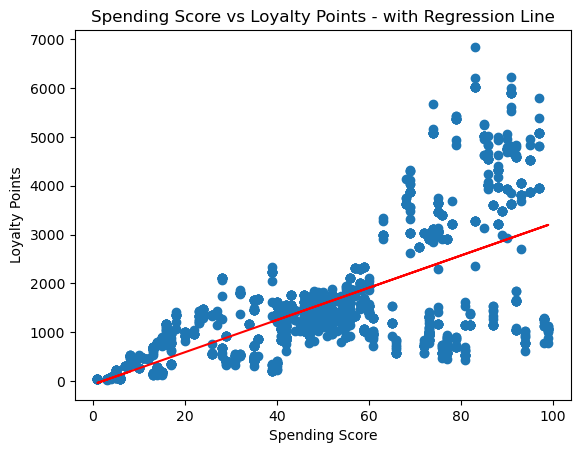

In [27]:
# Call defined function for scatterplot with regression line
# Plot the datapoints
scatter_with_regression(X1, y1, y1_pred,
                        'Spending Score vs Loyalty Points - with Regression Line',
                        'Spending Score', 'Loyalty Points')

In [28]:
# Check behaviour of residuals, too. Ideally, there should be no pattern

def plot_residuals(x, residuals, predictor_name):
    plt.scatter(x, residuals)
    plt.plot(x, [0]*len(x), color='red')  # Plot a horizontal line at y=0
    plt.title(f'Residuals on {predictor_name} vs Loyalty Points')
    plt.xlabel(predictor_name)
    plt.ylabel('Residuals on Loyalty Points')
    plt.tight_layout()
    plt.show()

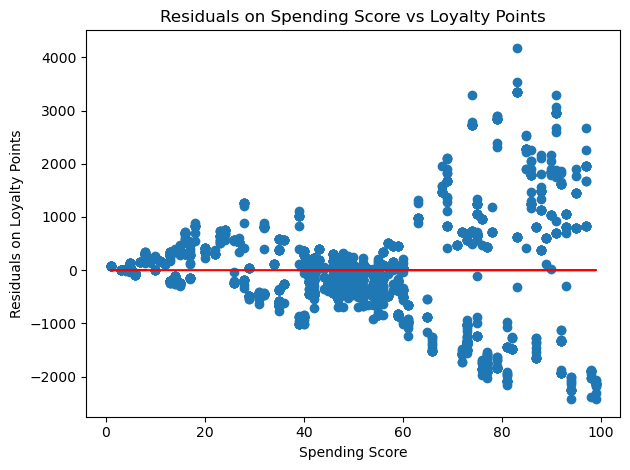

In [29]:
# Compute residuals
residuals1 = y1 - y1_pred

# Call defined function and plot residuals
plot_residuals(turtle_new['spending_score'],
               residuals1, 'Spending Score')

In [30]:
# Define function for QQ-plot visualisation of randomness of residuals
def plot_qq(residuals):
    sm.qqplot(residuals, fit=True, line='45')
    plt.ylabel('Residual Quartiles')
    plt.xlabel('Normal Quartiles')
    plt.title('QQ plot')
    plt.show()

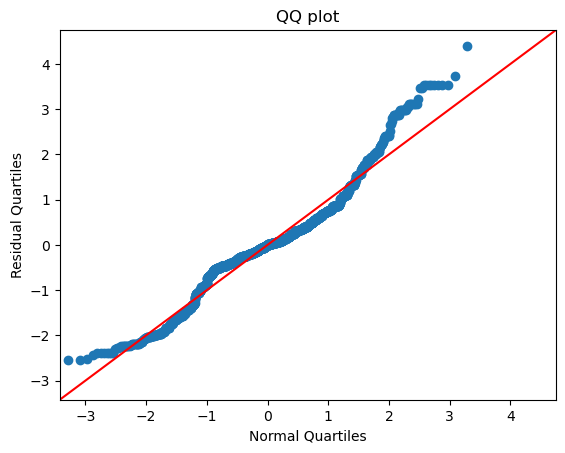

In [31]:
# Add qq-plot to further visualise residuals
plot_qq(residuals1)

**Note:** The random scatter of residuals around zero suggests the model captures the average trend reasonably well <br> without significant biases based on spending score

### 5b) Remuneration vs Loyalty Points

In [32]:
# Define independent variable/predictor
X2 = turtle_new['remuneration']

# Define dependent variable/response
y2 = turtle_new['loyalty_points']

# Check for linearity
#plt.scatter(x2, y2)

In [33]:
# Create formula and pass through OLS method
f2 = 'y2 ~ X2'
model2 = ols(f2, data = turtle_new).fit()

# Print the regression table
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          2.43e-209
Time:                        16:33:11   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Extract the estimated parameters
estimated_remuneration = model2.params
print('Estimated Parameters for Remuneration vs Loyalty:')
print(estimated_remuneration)

# Extract the standard errors
std_err_age = model2.bse
print('Standard Errors for Remuneration vs Loyalty')
print(std_err_age)

# Extract the predicted values
predicted_remuneration = model2.predict()
print('Predicted Values for Remuneration vs Loyalty')
print(predicted_remuneration)

Estimated Parameters for Remuneration vs Loyalty:
Intercept   -65.686513
X2           34.187825
dtype: float64
Standard Errors for Remuneration vs Loyalty
Intercept    52.170717
X2            0.977925
dtype: float64
Predicted Values for Remuneration vs Loyalty
[ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [35]:
# Create the linear regression model
# Set the Constant and the Coefficient
y2_pred = model2.params.Intercept + model2.params.X2 * turtle_new['remuneration']

# View
y2_pred

0        354.823741
1        354.823741
2        382.857758
3        382.857758
4        410.891774
           ...     
1995    2821.817228
1996    3102.157397
1997    3102.157397
1998    3298.395515
1999    3102.157397
Name: remuneration, Length: 2000, dtype: float64

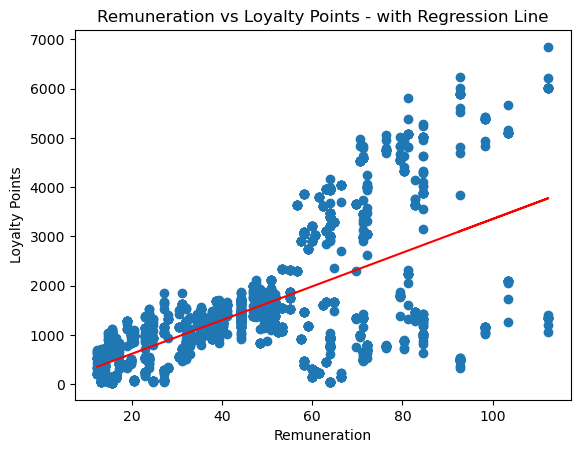

In [36]:
# Call defined function for scatterplot with regression line
# Plot the datapoints
scatter_with_regression(X2, y2, y2_pred,
                        'Remuneration vs Loyalty Points - with Regression Line',
                        'Remuneration', 'Loyalty Points')

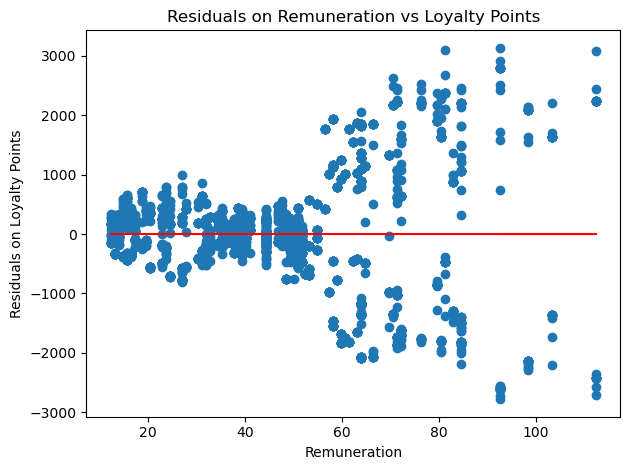

In [37]:
# Compute residuals
residuals2 = y2 - y2_pred

# Call defined function to plot residuals. Ideally, there should be no pattern
plot_residuals(turtle_new['remuneration'],
               residuals2, 'Remuneration')

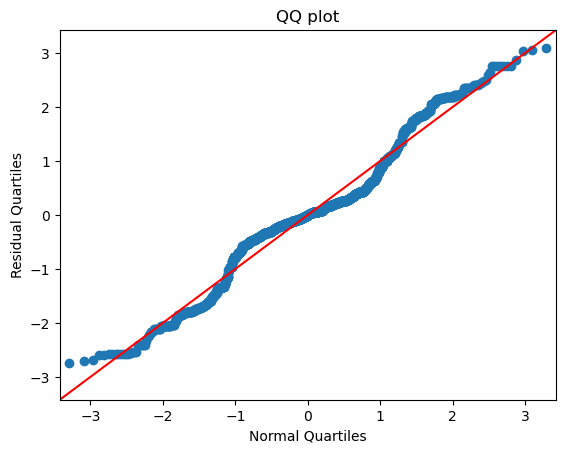

In [38]:
# Add qq-plot to further visualise residuals
plot_qq(residuals2)

**Note:** the trend in the residuals suggests that the model might not be entirely accurate, <br>
especially for customers with higher or lower remuneration.

### 5c) Customer Age vs Loyalty Points

In [39]:
# Define independent variable/predictor
X3 = turtle_new['age']

# Define dependent variable/response
y3 = turtle_new['loyalty_points']

# Check for linearity
#plt.scatter(x3, y3)

In [40]:
# Create formula and pass through OLS method
f3 = 'y3 ~ X3'
model3 = ols(f3, data = turtle_new).fit()

# Print the regression table
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 27 Apr 2024   Prob (F-statistic):             0.0577
Time:                        16:33:24   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X3            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Extract the estimated parameters
estimated_age = model3.params
print('Estimated Parameters for Age vs Loyalty:')
print(estimated_age)

# Extract the standard errors
std_err_age = model3.bse
print('Standard Errors for Age vs Loyalty')
print(std_err_age)

# Extract the predicted values
predicted_age = model3.predict()
print('Predicted Values for Age vs Loyalty')
print(predicted_age)

Estimated Parameters for Age vs Loyalty:
Intercept    1736.517739
X3             -4.012805
dtype: float64
Standard Errors for Age vs Loyalty
Intercept    88.248731
X3            2.113177
dtype: float64
Predicted Values for Age vs Loyalty
[1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [42]:
# Create the linear regression model
# Set the Constant and the Coefficient
y3_pred = model3.params.Intercept + model3.params.X3 * turtle_new['age']

# View
y3_pred

0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Name: age, Length: 2000, dtype: float64

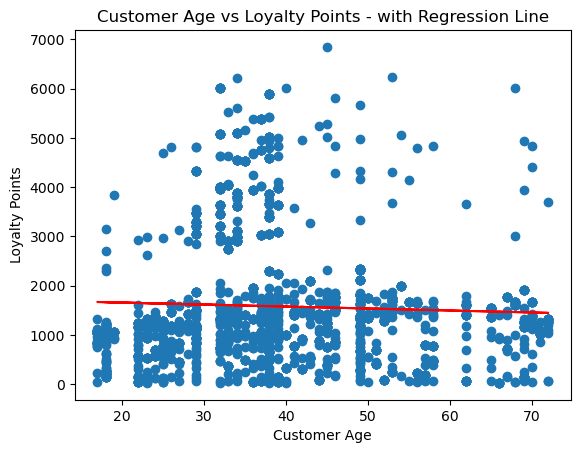

In [43]:
# Call defined function for scatterplot with regression line
# Plot the datapoints
scatter_with_regression(X3, y3, y3_pred,
                        'Customer Age vs Loyalty Points - with Regression Line',
                        'Customer Age', 'Loyalty Points')

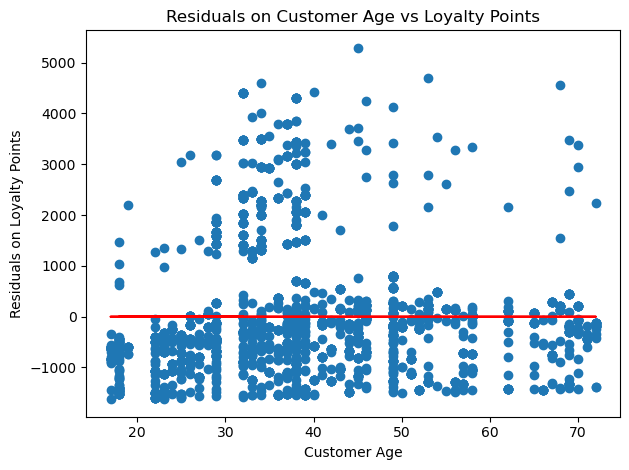

In [44]:
# Compute residuals
residuals3 = y3 - y3_pred

# Call defined function to plot residuals. Ideally, there should be no pattern
plot_residuals(turtle_new['age'],
               residuals3, 'Customer Age')

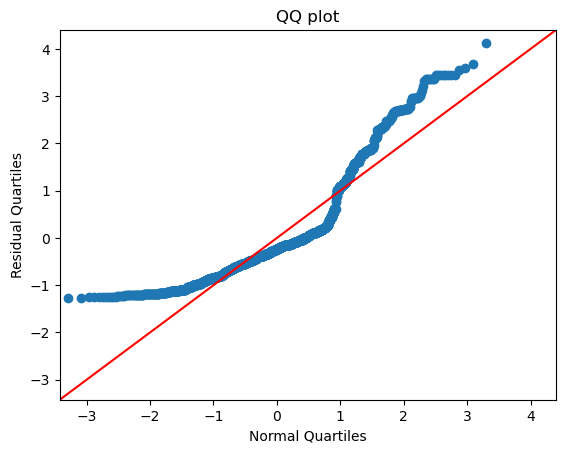

In [45]:
# Add qq-plot to further visualise residuals
plot_qq(residuals3)

**Note:** While the QQ plot suggests a somewhat normal distribution and the p-value indicates a possible statistical association between Age and Loyalty Points, the very low R-squared value is a major concern. This means that the model does a poor job of explaining the variation in loyalty points based solely on Age. There are likely other factors that play a much bigger role in determining customer loyalty.

## Observations from Linear Regression

**Spending vs Loyalty**
* densely concentrated at lower spending levels, indicating high loyalty despite low spending
* trendline indicates a positive correlation: as spensing increases, so does loyalty
* still, there is considerable variation in loyalty across spending 

**R-sq, F-stats and coeff**
* approx. 45.2% of the variation in loyalty can be attributed to spending
* the 2.92e-263 Prob (F-statistic) and the 0.000 p-value indicate high statistical significance
* finally, the Coefficient tells us that for every 1 unit increase in spending, loyalty increases by 33.06 units
    * segment customers in accordance with spending insights
    * invest in loyalty programmes and target high-spending customers

**Remuneration vs Loyalty**
* more evenly distributed across spending levels, but still higher density at lower end
* trendline shows a positive correlation, however loyalty varies significantly, irrespective of remuneration
* remuneration alone does not explain loyalty variation

**R-sq, F-stats and coeff**
* approx. 38% of the variation in loyalty can be explained by remuneration
* the 2.43e-209 Prob (F-statistic) and the 0.000 p-value indicate high statistical significance
* for every 1 unit increase in remuneration, loyalty increases by 34.19 units
    * optimise strategies to increase customer lifetime

**Age vs Loyalty**
* no clear concentration, dots are uniformly spread
* trendline suggests no significant age-related trend in loyalty

**R-sq, F-stats and coeff**
* only 0.2% of variation in loyalty can be explained by age
* a p-value of 0.0577 indicates only marginal statistical significance
* the **negative** Coefficient (-4.01) means loyalty descreases, as age units increase
    * loyalty MIGHT be descreasing with age - investigate further
    * while age may not be statistically significant at first glance, 
    <p>in terms of business decisions it'll be worth considering<br>
    age-specific marketing and other retention efforts</p>

## 5.1 Multiple Linear Regression


In [46]:
# New DataFrame for MLR
mlr = turtle_new[['gender', 'age', 'remuneration',
                  'spending_score', 'loyalty_points',
                  'education']].copy()

# View
mlr.head()

gender  age  remuneration  spending_score  loyalty_points education
0    Male   18         12.30              39             210  graduate
1    Male   23         12.30              81             524  graduate
2  Female   22         13.12               6              40  graduate
3  Female   25         13.12              77             562  graduate
4  Female   33         13.94              40             366  graduate

In [47]:
# Convert non-numeric categories to numerical representations suitable to the model
mlr['gender'] = mlr['gender'].astype('category')
mlr['gender'] = mlr['gender'].cat.codes

mlr['education'] = mlr['education'].astype('category')
mlr['education'] = mlr['education'].cat.codes

# View
mlr

gender  age  remuneration  spending_score  loyalty_points  education
0          1   18         12.30              39             210          3
1          1   23         12.30              81             524          3
2          0   22         13.12               6              40          3
3          0   25         13.12              77             562          3
4          0   33         13.94              40             366          3
...      ...  ...           ...             ...             ...        ...
1995       0   37         84.46              69            4031          0
1996       0   43         92.66               8             539          0
1997       1   34         92.66              91            5614          3
1998       1   34         98.40              16            1048          0
1999       1   32         92.66               8             479          0

[2000 rows x 6 columns]

In [48]:
# Check for null values
mlr.isnull().sum()

gender            0
age               0
remuneration      0
spending_score    0
loyalty_points    0
education         0
dtype: int64

In [49]:
# Define training features
X = mlr.drop(columns = 'loyalty_points')

# View
X

gender  age  remuneration  spending_score  education
0          1   18         12.30              39          3
1          1   23         12.30              81          3
2          0   22         13.12               6          3
3          0   25         13.12              77          3
4          0   33         13.94              40          3
...      ...  ...           ...             ...        ...
1995       0   37         84.46              69          0
1996       0   43         92.66               8          0
1997       1   34         92.66              91          3
1998       1   34         98.40              16          0
1999       1   32         92.66               8          0

[2000 rows x 5 columns]

In [50]:
# Define label
y = mlr['loyalty_points']

# View
y

0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64

In [51]:
# Split the data into training and testing (30/70)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [52]:
# Check for multicollinearity
# Add a constant
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame
vif = pd.DataFrame() 

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns
vif['features'] = x_temp.columns  
 
# Values above 10 indicate an issue of multicollinearity
# Print
print(vif.round(2))

   VIF Factor        features
0       24.55           const
1        1.01          gender
2        1.07             age
3        1.00    remuneration
4        1.06  spending_score
5        1.02       education


**Note** Interpretation of the results:

The intercept (constant) has a VIF of 24.55, which is unusually high. <br>However, this is common because it represents a combination of all other variables.

Overall, there is no evidence of significant multicollinearity among the features,<br> as all VIF values are below the commonly accepted threshold of 5. <br>This is a positive sign for the reliability of the regression analysis.

In [53]:
# Define Linear Regression Model (LRM)
lr = LinearRegression()

# Fit training data to LRM
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
# Check parameters
c = lr.intercept_

# View
c

-2166.2065207099017

In [55]:
# Check coefficients
m = lr.coef_

# View the 5 coefficients for our 5 training features
m

array([-89.37061005,  10.97302385,  34.55564248,  33.66816101,
         4.32565684])

In [56]:
# Checking the model is working
# Predicting 'loyalty_points' using the training set
y_pred_train = lr.predict(X_train)

In [57]:
# View
y_pred_train

array([-182.86420372, 3591.22987769, 3038.52832131, ..., 1740.63906439,
       1348.51212554, 1397.50895781])

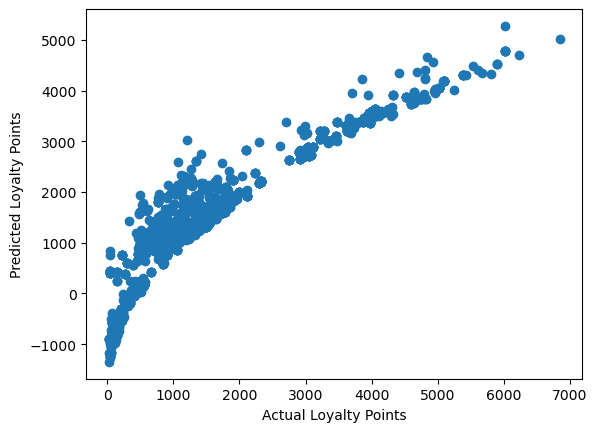

In [58]:
# Plotting the model for visual review
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.show()

In [59]:
# Check R-sq. for training data
r2_score(y_train, y_pred_train)

0.8450095580929282

**Note:** The R-squared (R²) value indicates how well the data points align with the regression line.<br>
In this case, the R² of 0.845, being close to 1, suggests a good fit. This means that our training features <br> can explain approximately 84.5% of the variance in the target variable (loyalty points).

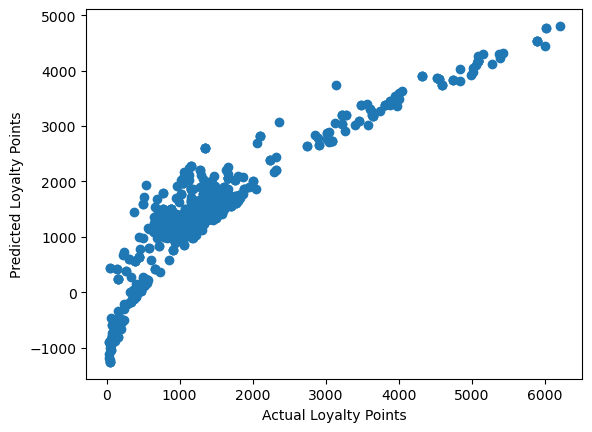

In [60]:
# Introduce the test data
y_pred_test = lr.predict(X_test)

# Plotting the model for visual review
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.show()

In [61]:
# Check R-sq. for test data
r2_score(y_test, y_pred_test)

0.8303647526636487

In [62]:
# Get column names for features (excluding intercept)
feature_names = X.columns.tolist()

# Print coefficients with corresponding feature names
for i, coef in enumerate(lr.coef_):
  print(f"{feature_names[i]}: {coef:.2f}")

gender: -89.37
age: 10.97
remuneration: 34.56
spending_score: 33.67
education: 4.33


**Notes, based on coefficients:** 

* Spending_score (33.67): Likely has the strongest positive impact on loyalty points
* Remuneration (34.56): Also has a positive impact, but the difference with spending_score might be minimal
* Age (10.97): Has a positive but smaller impact
* Education (4.33): Has a relatively small positive impact
* Gender (-89.37): Interestingly, has a negative impact on loyalty points (in terms of **association, not causation**)

This is considering the impact based on an MLR investigating 5 independent variables together. <br>
Further investigation needed.


## 6. Observations and insights

**Spending vs. Loyalty**

* There's a clear positive correlation between spending and loyalty. <br> Higher spending generally leads to higher loyalty.
* Businesses should invest in loyalty programs and target high-spending customers <br> to maintain and increase loyalty.

**Remuneration vs. Loyalty**

* Similar to spending, there's a positive correlation between remuneration and loyalty, but <br> it doesn't explain loyalty variation as effectively as spending does.
* Strategies should focus on optimizing customer lifetime value, <br> but remuneration alone may not be sufficient to drive loyalty.

**Age vs. Loyalty**

* There seems to be no significant relationship between age and loyalty,<br> as indicated by the low R-squared value and marginal statistical significance.
* While age-specific marketing and retention efforts might be considered, <br>age alone may not be a strong predictor of loyalty.

**Multiple Linear Regression Insights**

* Spending score has the strongest positive impact on loyalty points, <br>followed by remuneration, age, and education.
        
**Gender and Education**
* Gender surprisingly has a negative impact on loyalty points,<br> though this is likely an association rather than causation.
* **Higher percentage of female customers** is unusual <br>in the traditionally male-dominated gaming industry <br> this can be used to tailor marketing strategy.


# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Assignment Execution

**Data Preparation**
* Importing and structuring data for decision tree analysis.

**Decision Tree Regressor**
* Creation of a decision tree regressor model.
* Pruning strategies and model evaluation.
* GridSearchCV.
* Visualisation and interpretation of the final decision tree.

**Final Model Interpretation**
* Justification of pruning strategy and insights into decision-making implications.

**Business Insights and Future Actions**
* Summary of key findings and recommendations for future analysis.



## 1. Load and prepare the data

In [63]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import export_graphviz

# Settings for the notebook.
warnings.filterwarnings('ignore')
#plt.rcParams['figure.figsize'] = [15, 10]

In [64]:
# Creating a new DataFrame for clean data
turtle_2 = turtle_new.copy()  # Creating a copy of the DataFrame

# Dropping the target variable from the input data
# Drop unnecessary columns
X = turtle_2.drop(columns=['loyalty_points',
                           'review',
                           'summary'])     

# Specifying the target variable
y = turtle_2['loyalty_points']

X

gender  age  remuneration  spending_score education  product
0       Male   18         12.30              39  graduate      453
1       Male   23         12.30              81  graduate      466
2     Female   22         13.12               6  graduate      254
3     Female   25         13.12              77  graduate      263
4     Female   33         13.94              40  graduate      291
...      ...  ...           ...             ...       ...      ...
1995  Female   37         84.46              69       PhD      977
1996  Female   43         92.66               8       PhD      979
1997    Male   34         92.66              91  graduate     1012
1998    Male   34         98.40              16       PhD     1031
1999    Male   32         92.66               8       PhD      453

[2000 rows x 6 columns]

In [65]:
# Review X and Y
# Exploring the new DataFrame
#print(X.head())
#print(y.head())

In [66]:
#X.info()

In [67]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: loyalty_points
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


## 2. Create train and test data sets.

In [68]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split\
(X, y, test_size=0.3, random_state=42)

In [69]:
# One-hot encode categorical variables into suitable formats
X_encoded = pd.get_dummies(X)

# Splitting the encoded data into train and test sets (70/30)
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split\
(X_encoded, y, test_size=0.3, random_state=42)

In [70]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2000 non-null   int64  
 1   remuneration            2000 non-null   float64
 2   spending_score          2000 non-null   int64  
 3   product                 2000 non-null   int64  
 4   gender_Female           2000 non-null   bool   
 5   gender_Male             2000 non-null   bool   
 6   education_PhD           2000 non-null   bool   
 7   education_basic         2000 non-null   bool   
 8   education_diploma       2000 non-null   bool   
 9   education_graduate      2000 non-null   bool   
 10  education_postgraduate  2000 non-null   bool   
dtypes: bool(7), float64(1), int64(3)
memory usage: 76.3 KB


## 3. Create Decision tree regressor

Why a Regressor? - 'loyalty_points' can take on any numerical value, and is hence considered a continuous variable. 

Regression Decision Trees work well for predicting continuous target variables by splitting the data based on features like 'age', 'remuneration', and 'spending_score'. This helps identify patterns that influence the range of possible 'loyalty_points' a customer might have.

In [71]:
# Creating a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fitting the regressor object to the encoded data set
regressor.fit(X_train_encoded, y_train)

DecisionTreeRegressor(random_state=42)

In [72]:
# Generate predictions on the test set
y_pred = regressor.predict(X_test_encoded)

In [73]:
def calculate_metrics(y_test, y_pred):
  """
  This function calculates and returns MAE, MSE, and RMSE metrics.

  Args:
      y_test (pandas.Series): The ground truth target variable values.
      y_pred (pandas.Series): The predicted target variable values from the model.

  Returns:
      dict: A dictionary containing the calculated metrics (MAE, MSE, RMSE).
  """

  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = math.sqrt(mse)

  return {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

In [74]:
# Call defined function to calculate metrics
metrics = calculate_metrics(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error: {metrics['MAE']}")
print(f"Mean Squared Error: {metrics['MSE']}")
print(f"Root Mean Squared Error: {metrics['RMSE']}")

Model Evaluation:
Mean Absolute Error: 37.903333333333336
Mean Squared Error: 10407.37
Root Mean Squared Error: 102.01651827032718


In [75]:
#y_pred

In [76]:
y_train

836      338
575     4007
557     3221
1235    1152
1360    1665
        ... 
1130     385
1294    1376
860     1264
1459    1425
1126    1463
Name: loyalty_points, Length: 1400, dtype: int64

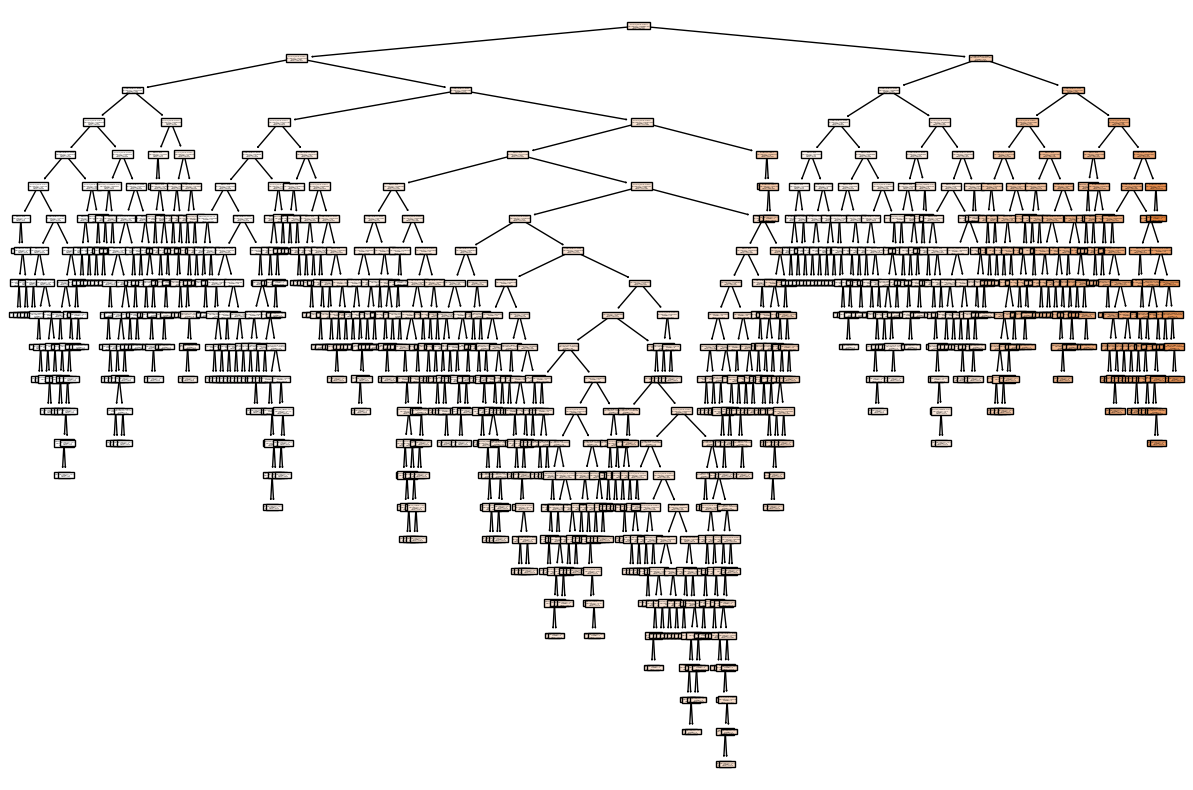

Depth = 23
Leaves = 563


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- education
- gender
Feature names seen at fit time, yet now missing:
- education_PhD
- education_basic
- education_diploma
- education_graduate
- education_postgraduate
- ...


In [77]:
# Fit the original model
original_regressor = DecisionTreeRegressor(random_state=42)  # Create the regressor object
original_regressor.fit(X_train_encoded, y_train)  # Fit the model on the encoded training data

# Convert the column names (Index) to a list
feature_names = X_encoded.columns.tolist()

# Plot the original decision tree
plt.figure(figsize=(15, 10))
plot_tree(original_regressor, filled=True,
          feature_names=feature_names)
plt.show()

# Print additional information
print('Depth =', original_regressor.get_depth())
print('Leaves =', original_regressor.get_n_leaves())
tests = accuracy_score(y_test, original_regressor.predict(X_test))
print('Accuracy score: {:2.2%}'.format(tests))

In [78]:
original_regressor

DecisionTreeRegressor(random_state=42)

### Observations

**Mean Absolute Error (MAE):**
* MAE represents the average absolute difference between the predicted values and the actual values.
* An MAE of 38.698 means that, on average, the model's predictions are off by about 38.70 loyalty points.

**Mean Squared Error (MSE):**
* The MSE of approximately 14113.775 implies that, on average, the squared difference between predicted 
<p>and actual loyalty points is around 14113.775.</p>

**Root Mean Squared Error (RMSE):**
* The RMSE of approximately 118.80 loyalty points suggests that, on average,
<p>the model's predictions deviate from the actual values by about 118.80 loyalty points.</p>

In addition to the above **RMSE - MAE = 80.11 suggesting that the model does not accurately predict actual values.** <br> This may be due to capturing too much **noise**.

### Pruning

**Note on info below:** <br> This is the output for the 'max_depth' and 'min_samples' I've experimented with <br> before applying GridSearchCV to determine ideal numbers for the Decision Tree Regressor

In [79]:
# Define the data
data = {
    'max_depth': [5]*4 + [4]*4 + [3]*4 + [2]*4,
    'min_samples_leaf': [100, 75, 50, 25]*4,
    'RSME-MAE': [106.11, 101.16, 99.89, 72.32,
                 103.21, 99.26, 103.77, 83.95,
                 103.19, 102.95, 104.31, 104.31,
                 144.68, 144.68, 144.68, 144.68]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the original tree value
print('max_depth\tmin_samples_leaf\tRSME-MAE')

# Iterate over each row of the DataFrame and print the values
for index, row in df.iterrows():
    print(f"{row['max_depth']}\t\t{row['min_samples_leaf']}\t\t{row['RSME-MAE']:.2f}")
    
#print(f'\t\t80.11 (original tree)')    # Original Regressor: RSME - MAE = 80.11

max_depth	min_samples_leaf	RSME-MAE
5.0		100.0		106.11
5.0		75.0		101.16
5.0		50.0		99.89
5.0		25.0		72.32
4.0		100.0		103.21
4.0		75.0		99.26
4.0		50.0		103.77
4.0		25.0		83.95
3.0		100.0		103.19
3.0		75.0		102.95
3.0		50.0		104.31
3.0		25.0		104.31
2.0		100.0		144.68
2.0		75.0		144.68
2.0		50.0		144.68
2.0		25.0		144.68


**Note:** <br> Following from the above, see Decision Tree with best RSME - MAE, <br> at max_depth = 5 and min_samples_leaf = 25

### Further clarification with GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

# Crossreference best parameters with GridSearchCV
# Define the parameter grid for hyperparameter search (adjust parameters as needed)
param_grid = {'max_depth': [2, 3, 4, 5, 6],
              'min_samples_split': [5, 10, 25, 50, 75, 100]}

# Create a decision tree regressor model
model = DecisionTreeRegressor()

# Define the GridSearchCV object with scoring metric (e.g., negative MSE)
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Have to redo the one hot encoding here
# One-hot encode categorical variables into suitable formats
X_encoded = pd.get_dummies(X)

# Fit the grid search to your data
grid_search.fit(X_encoded, y)

# Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

# Get the best score achieved during cross-validation
best_score = grid_search.best_score_

print("Best Model Parameters:", grid_search.best_params_)
print("Best Mean Squared Error (negative):", best_score)


Best Model Parameters: {'max_depth': 6, 'min_samples_split': 10}
Best Mean Squared Error (negative): -48041.25571187408


Model Evaluation:
Mean Absolute Error: 153.94711418599584
Mean Squared Error: 57147.343964394044
Root Mean Squared Error: 239.0551065432279


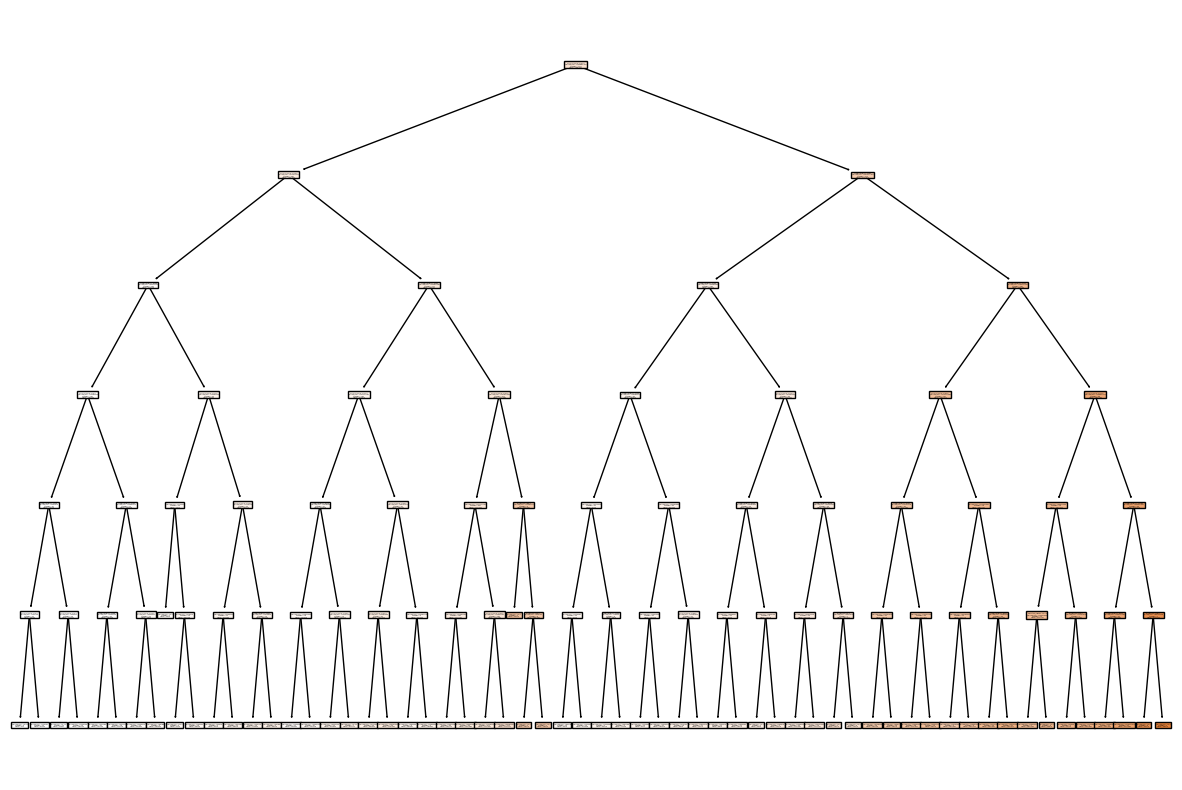

In [81]:
# Create a pruned decision tree regressor with further adjustments
gridsearch_regressor = DecisionTreeRegressor(max_depth=6,
                                         min_samples_split=5,
                                         random_state=42)

# Fit the pruned regressor to the encoded training data
gridsearch_regressor.fit(X_train_encoded, y_train)

# Predictions on the test set using the pruned model
y_pred_pruned = gridsearch_regressor.predict(X_test_encoded)

# Call defined function to calculate metrics and evaluate model
metrics = calculate_metrics(y_test, y_pred_pruned)

print("Model Evaluation:")
print(f"Mean Absolute Error: {metrics['MAE']}")
print(f"Mean Squared Error: {metrics['MSE']}")
print(f"Root Mean Squared Error: {metrics['RMSE']}")

# Plot the final decision tree
plt.figure(figsize=(15, 10))
plot_tree(gridsearch_regressor, filled=True, 
          feature_names=feature_names)
plt.show()

# Export the decision tree as a Graphviz DOT file
export_graphviz(gridsearch_regressor, out_file='decision_tree_final_regressor.dot', 
                filled=True, feature_names=X_encoded.columns)

# Convert the DOT file to an image file (e.g., PNG)
#subprocess.call(['dot', '-Tpng', 'decision_tree.dot', '-o',
 #                'decision_tree_final_regressor.png'])

**GridSearch_regressor: RSME - MAE = 85.06**

Model Evaluation:
Mean Absolute Error: 191.44988619973708
Mean Squared Error: 69571.53241391215
Root Mean Squared Error: 263.76416059410377


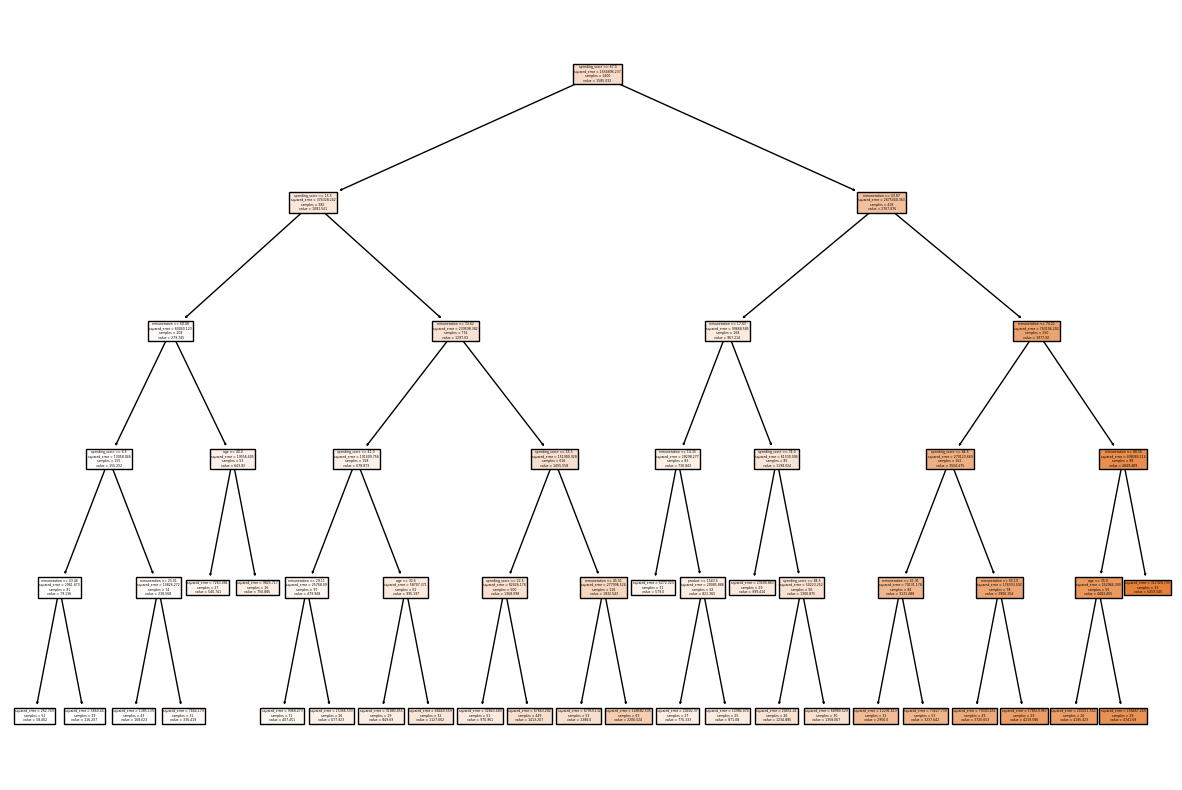

In [82]:
# Create a pruned decision tree regressor with further adjustments
pruned_regressor = DecisionTreeRegressor(max_depth=5,
                                         min_samples_leaf=25,
                                         random_state=42)

# Fit the pruned regressor to the encoded training data
pruned_regressor.fit(X_train_encoded, y_train)

# Predictions on the test set using the pruned model
y_pred_pruned = pruned_regressor.predict(X_test_encoded)

# Call defined function to calculate metrics and evaluate model
metrics = calculate_metrics(y_test, y_pred_pruned)

print("Model Evaluation:")
print(f"Mean Absolute Error: {metrics['MAE']}")
print(f"Mean Squared Error: {metrics['MSE']}")
print(f"Root Mean Squared Error: {metrics['RMSE']}")

# Plot the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_regressor, filled=True,
          feature_names=feature_names)
plt.show()

**pruned_regressor: RSME - MAE = 72.32**

* visualisation not legible in Notebook (used dot PNG file to investigate)

In [83]:
from sklearn.tree import export_graphviz
import subprocess
import pydot

# Export the decision tree as a Graphviz DOT file
export_graphviz(pruned_regressor, out_file='decision_tree_pruned_regressor.dot', 
                filled=True, feature_names=X_encoded.columns)

# Convert the DOT file to an image file (e.g., PNG)
#subprocess.call(['dot', '-Tpng', 'decision_tree.dot', '-o',
    #             'decision_tree_pruned_regressor.png'])

## 4. Fit and plot final model

### Random Forest

In [84]:
# Split the data into train and test sets (30/70)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
random_forest_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_regressor.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = math.sqrt(mse_rf)

# Print evaluation metrics
print('Random Forest - Mean Absolute Error:', mae_rf)
print('Random Forest - Mean Squared Error:', mse_rf)
print('Random Forest - Root Mean Squared Error:', rmse_rf)

# Export each decision tree as a Graphviz DOT file
#for i, estimator in enumerate(random_forest_regressor.estimators_):
 #   export_graphviz(estimator, out_file=f'random_forest_regressor_tree_{i}.dot',
  #                  filled=True, feature_names=X_encoded.columns)

Random Forest - Mean Absolute Error: 30.54751666666666
Random Forest - Mean Squared Error: 6372.5948595
Random Forest - Root Mean Squared Error: 79.82853411844664


**RandomForest: RMSE - MAE = 49.28**

In [85]:
from sklearn.ensemble import RandomForestRegressor

# X_train and y_train are your training features and target respectively
# Create and train your RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort the dictionary by importance (descending order)
sorted_feature_importances = sorted(feature_importance_dict.items(),
                                    key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in sorted_feature_importances:
    print(f'Feature: {feature}, Importance: {importance}')

Feature: spending_score, Importance: 0.49936228504485775
Feature: remuneration, Importance: 0.4822516146824284
Feature: age, Importance: 0.01481466052858618
Feature: product, Importance: 0.0012864136689233663
Feature: education_graduate, Importance: 0.0005521893517514559
Feature: education_PhD, Importance: 0.00046556045997140255
Feature: gender_Male, Importance: 0.0003400878339004275
Feature: education_diploma, Importance: 0.00032682271617786397
Feature: gender_Female, Importance: 0.00032177902799161945
Feature: education_postgraduate, Importance: 0.0002457292647224655
Feature: education_basic, Importance: 3.2857420689174056e-05




### RandomForest insights

**Spending Score Importance (0.499)** 
* This feature has the highest importance, indicating that it is the most influential factor in predicting the target variable. 
* This suggests that the spending score of customers has the most significant impact on accumulation of loyalty points.

**Remuneration Importance (0.482)** 
* The second most important feature is remuneration, which is almost as important as spending score. 
* This implies that the salary of customers also plays a crucial role in determining the target variable.

**Age Importance (0.015)** 
* Age has a relatively lower importance compared to spending score and remuneration. 
* While still relevant, its impact on the target variable is not as significant as the other two factors.

**Product Importance (0.001)** 
* Product features have a very low importance, suggesting that they have minimal influence on <br> the target variable compared to spending score, remuneration, and age.

**Education and Gender Importance (<0.001)** 
* Education level and gender have negligible importance, <br>indicating that they have little to no impact on the target variable in this context.

## 5. Discuss: Insights and observations

Random Forest outperforms the pruned regressor for loyalty analysis. It captures data patterns better (lower RMSE-MAE) and generalises well (robustness). While the pruned regressor offers interpretability - and has outperformed the GridSearchCV outcome - the Random Forest provides a more accurate ranking of factors influencing customer loyalty. Hence, the Random Forest has been used in final analysis and the pruned regressor for interpreting the results. This approach balances accuracy with interpretability for a comprehensive understanding of loyalty factors.

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Assignment Execution

**Data Preparation**
* Importing and structuring data for clustering analysis.

**Visualisation and Exploration**
* Scatterplot and pairplot visualisation to understand data distribution.

**Determining Optimal Number of Clusters**
* Application of Elbow and Silhouette methods for cluster selection.

**Evaluating k-means Models**
* Exploration of different k values and their impact on clustering.

**Final Model and Interpretation**
* Justification of selected k value and interpretation of cluster characteristics.

**Insights and Observations**
* Reflections on identified customer segments and their potential business implications.


## 1. Load and explore the data

In [86]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [87]:
# Load the CSV file(s) as turtle_two
turtle_two = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
#turtle_two.head()

In [88]:
# Drop unnecessary columns by name
columns_to_drop = ['language', 'platform', 'summary', 'review']  # Specify the column names to drop
turtle_two = turtle_two.drop(columns_to_drop, axis=1)

# Rename the column headers
turtle_two = turtle_two.rename(columns={'remuneration (k£)': 'remuneration',
                               'spending_score (1-100)': 'spending_score'})

# View column names
turtle_two.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product  
0      453  
1      466  
2      254  
3      263  
4      291

In [89]:
# Explore the data
turtle_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 109.5+ KB


In [90]:
# Descriptive statistics
turtle_two.describe()

age  remuneration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000

In [91]:
# Check for missing values
turtle_two.isnull().sum()

gender            0
age               0
remuneration      0
spending_score    0
loyalty_points    0
education         0
product           0
dtype: int64

## 2. Plot

In [92]:
# Prepare the data for k-means analysis
turtle_k = turtle_two[['remuneration',
                       'spending_score']]

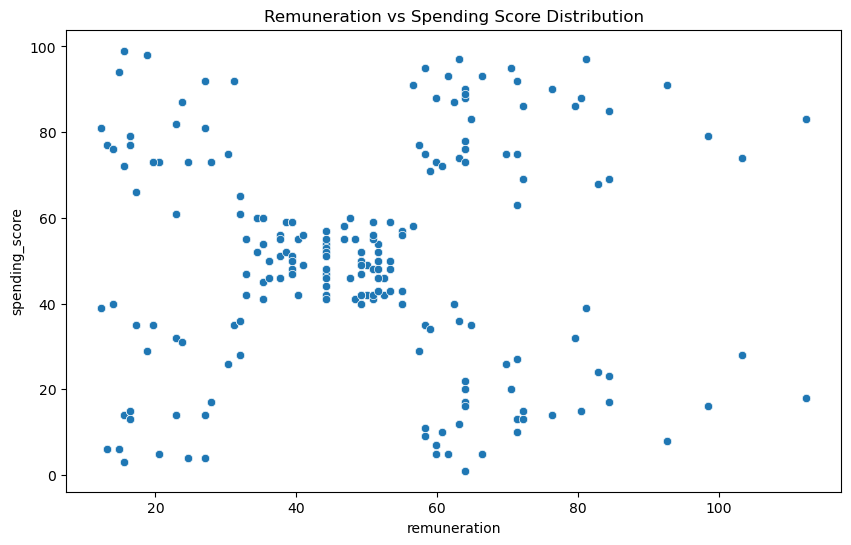

In [93]:
# Create a scatterplot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=turtle_k)
plt.title('Remuneration vs Spending Score Distribution')
plt.show()

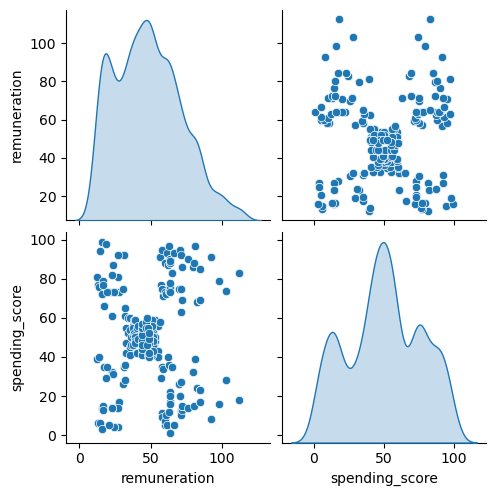

In [94]:
# Create a pairplot with Seaborn
sns.pairplot(turtle_k,
             vars=turtle_k,
             diag_kind= 'kde')
plt.show()

## 3. Elbow and silhouette methods

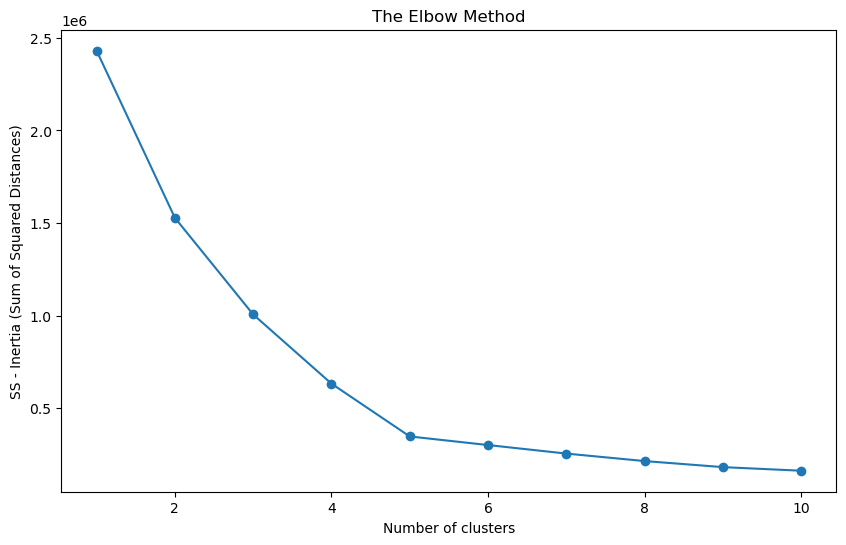

In [95]:
# Determine the number of clusters: Elbow method
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(turtle_k)
    ss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SS - Inertia (Sum of Squared Distances)')

plt.show()

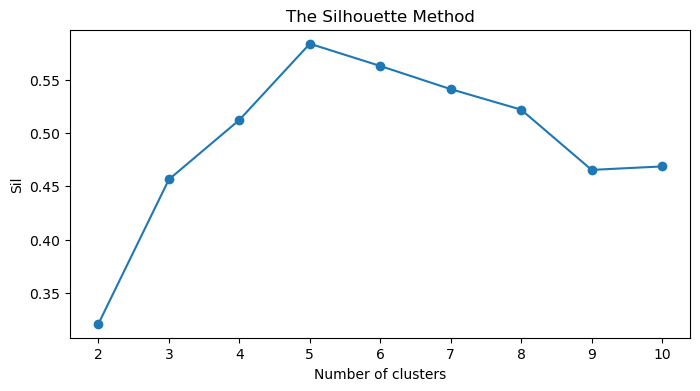

In [96]:
# Determine the number of clusters: Silhouette method
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(turtle_k)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(turtle_k,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method
plt.figure(figsize=(8, 4))
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')

plt.show()

## 4. Evaluate k-means model at different values of *k*

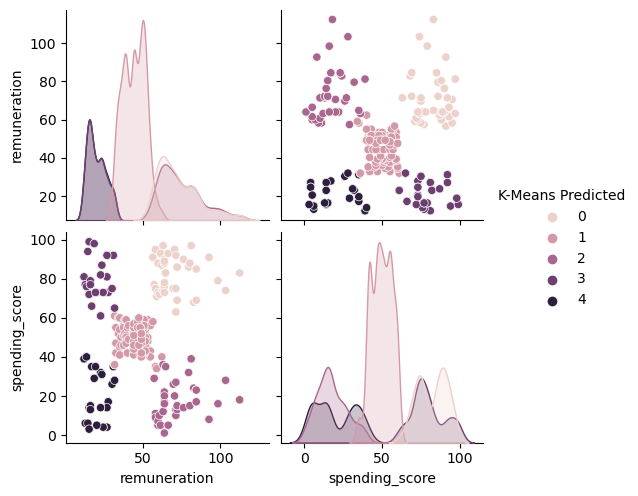

In [97]:
# Use 5 clusters (several n_clusters have been run, 5 is best fit)
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(turtle_k)

clusters = kmeans.labels_
turtle_k['K-Means Predicted'] = clusters

# Plot the predicted clusters
sns.pairplot(turtle_k,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [98]:
# Check number of observations per predicted class
turtle_k['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

In [99]:
# View the K-Means predicted
print(turtle_k.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


<Axes: xlabel='remuneration', ylabel='spending_score'>

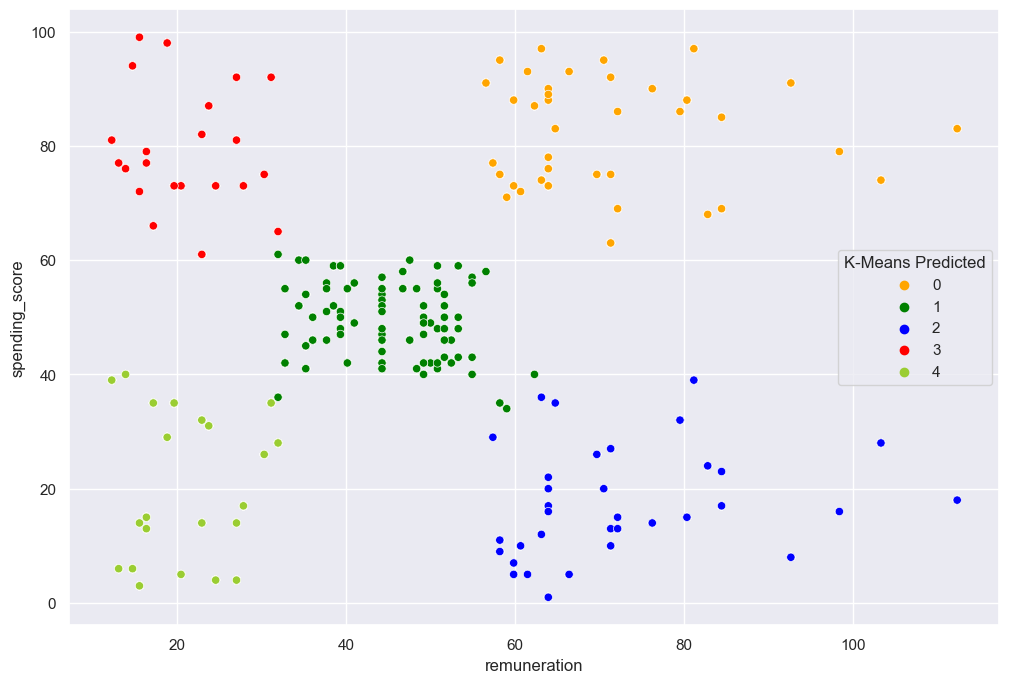

In [100]:
# Visualise the clusters
sns.set(rc = {'figure.figsize':(12, 8)})
sns.scatterplot(x='remuneration',
               y='spending_score',
               data=turtle_k,
               hue='K-Means Predicted',
               palette=['orange', 'green',
                        'blue', 'red', 'yellowgreen'])

In [101]:
# Save cluster labels back to the original DataFrame
turtle_two['Cluster Label'] = turtle_k['K-Means Predicted']

In [102]:
# Load the data
data = turtle_k

# Select features for clustering
features = ['remuneration',
            'spending_score']

# Define number of clusters
k = 5

# Perform k-means clustering (without standardization)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data[features])  # Use data directly without transformation

# Add cluster label to data
data['cluster'] = kmeans.labels_

# Create the interactive scatter plot with Plotly Express
import plotly.express as px

fig = px.scatter(
    data,
    x=features[0],
    y=features[1],
    color='cluster',
    hover_name=data.index,  # Display data point index on hover
    hover_data=[data[col] for col in features],  # Display feature values on hover
)

# Add centroids as markers
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
fig.add_trace(
    px.scatter(
        centroids, x=features[0], y=features[1],
        size_max=15, color=centroids.index
    ).data[0]
)

# Add plot title and labels
fig.update_layout(
    title='K-Means Clustering Interactive Visualisation',
    xaxis_title=features[0],
    yaxis_title=features[1],
)

# Display the interactive plot
fig.show()

In [103]:
# Create a new DataFrame to store cluster information
cluster_data = pd.DataFrame()

# Add a column for cluster labels
cluster_data['cluster'] = data['cluster']

# Add columns for your data points (assuming numerical features)
cluster_data['remuneration'] = data['remuneration']
cluster_data['spending_score'] = data['spending_score']

# Loop through each cluster
for cluster_number in range(k):
  # Filter data points belonging to the current cluster
  cluster_data_filtered = cluster_data[cluster_data['cluster'] == cluster_number]

  # Print cluster number
  print(f'\nCluster {cluster_number}:')

  # Print descriptive statistics
  #print(cluster_data_filtered.describe())

  # Print a sample of data points
  print(cluster_data_filtered.head()) 


Cluster 0:
     cluster  remuneration  spending_score
123        0         56.58              91
125        0         57.40              77
127        0         58.22              95
129        0         58.22              75
131        0         58.22              75

Cluster 1:
    cluster  remuneration  spending_score
42        1         31.98              36
43        1         31.98              61
46        1         32.80              55
47        1         32.80              47
48        1         32.80              42

Cluster 2:
     cluster  remuneration  spending_score
124        2         57.40              29
128        2         58.22              11
130        2         58.22               9
134        2         59.86               5
136        2         59.86               7

Cluster 3:
   cluster  remuneration  spending_score
1        3         12.30              81
3        3         13.12              77
5        3         13.94              76
7        3         1

##  Discuss: Insights and observations

The resultant model reveals 5 distinct clusters, validated through multiple methods:

* Initial pairplot examination indicates the presence of 5 clusters, as evidenced by distinct groupings of data points.
* The **elbow method** displays a noticeable change after 5 clusters.
* The **silhouette score** peaks precisely at 5 clusters.
* With the exception of the larger cluster 1, the cluster sizes are relatively uniform across the remaining 4. <br> Attempts to adjust the number of clusters result in worsening of uniformity.<br/>
* Tests conducted with both 4 and 6 clusters affirm that 5 clusters remain optimal. <br> The code can be easily adjusted (n_clusters) for further model runs. <br/>

**Cluster Analysis**

**Cluster 1 (n=774)**

This is the largest cluster, with customers having a moderate income and average spending habits.
* Recommendation: Focus on retention strategies for this core customer base. <br> Offer loyalty points for various activities like product reviews, social media engagement, <br> or completing surveys to keep them engaged. Personalise communication and <br>promotions based on their purchase history.


**Cluster 0 (n=356)**

These customers might be young adults, students, or individuals with low reported income. <br>Despite potentially lower spending power, they have a high spending score, <br>indicating they might be frequent spenders but with lower overall purchase values.
* Recommendation: Offer targeted promotions and discounts to incentivise higher-value purchases. <br> Explore alternative loyalty point accumulation methods beyond just spending <br>(e.g., points for social media engagement, referrals).
    
**Cluster 2 (n=330)**

These customers might have a moderate income but spend less frequently. <br>Additionally, the lack of age information makes it difficult to determine demographics.
* Recommendation: Implement targeted marketing campaigns highlighting the benefits of the loyalty programme <br> and how it can help them save money in the long run. <br> Offer personalised loyalty point rewards based on their past purchases.

**Cluster 4 (n=271)**

These customers might have a slightly higher income but spend less frequently or on lower-priced items.
* Recommendation: Offer loyalty point multipliers for specific product categories or <br> brands they might be interested in based on their purchase history. <br> Implement tiered loyalty programs where they can unlock higher benefits with increased spending.

**Cluster 3 (n=269)**

These customers likely have a higher income and are frequent spenders.
* Recommendation: Develop exclusive loyalty programme benefits for this high-value segment, <br> such as early access to sales, personalized shopping experiences, or higher point redemption rates. <br> Consider premium memberships with additional perks.



# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Assignment Execution

**Data Loading and Preprocessing**
* Initial data exploration and preprocessing steps.

**Tokenisation and Wordcloud Generation**
* Tokenisation of reviews and summaries, followed by wordcloud creation.

**Frequency Distribution and Polarity Analysis**
* Analysis of word frequency and sentiment polarity in reviews and summaries.

**Top Positive and Negative Reviews**
* Identification and presentation of top positive and negative reviews and summaries.

**Insights and Observations**
* Interpretation of NLP analysis results and implications for marketing strategy.


## 1. Load and explore the data

In [104]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import re
import matplotlib.pyplot as plt
import wordcloud

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import textblob
from textblob import TextBlob
from scipy.stats import norm

from collections import Counter
import emoji

import warnings
warnings.filterwarnings('ignore')

In [105]:
# Load the data set as new DataFrame
turtle_nlp = pd.read_csv('turtle_reviews.csv')

# Retaining necessary columns only
turtle_nlp = turtle_nlp[['review',
                         'summary']]

# View DataFrame
turtle_nlp.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [106]:
# Explore data set
turtle_nlp.info()
turtle_nlp.describe()

# Determine if there are missing values
turtle_nlp.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively      <br>      (review and summary)

In [107]:
# Change 'review' to lowercase and join with spaces
turtle_nlp['review'] = turtle_nlp['review'].\
apply(lambda x: ' '.join(x.lower().split()))

# Change 'summary' to lowercase and join with spaces
turtle_nlp['summary'] = turtle_nlp['summary'].\
apply(lambda x: ' '.join(x.lower().split()))

# View
turtle_nlp.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [108]:
# Replace all the punctuation in 'review' column
turtle_nlp['review'] = turtle_nlp['review'].\
apply(lambda x: re.sub(r'[^\w\s]', '', x))

# View
turtle_nlp.head(5)

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [109]:
# Replace all the punctuation in 'summary' column
turtle_nlp['summary'] = turtle_nlp['summary'].\
apply(lambda x: re.sub(r'[^\w\s]', '', x))

# View
turtle_nlp.head(5)

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

### 2c) Review duplicates in both columns

In [110]:
# Check for duplicates considering both 'review' and 'summary' columns
duplicate_rows = turtle_nlp.duplicated(subset=['review', 'summary'], keep=False)

# Count and display the number of duplicate rows
print('Duplicate rows (total):', duplicate_rows.sum())

# Optionally, view the first few duplicate rows
#print(turtle_nlp[duplicate_rows].head(60))

Duplicate rows (total): 60


**Note on duplicates:** Duplicates will NOT be removed, as they appear genuine upon review.<br>
Removal of genuine duplicates leads to:
* loss of valuable data
* distorts sentiment
* inaccurate insights


## 3. Tokenise and create WordClouds

In [111]:
# Create new DataFrame (copy DataFrame)
turtle_tokens = turtle_nlp.copy()

# View DataFrame
turtle_tokens.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [112]:
# Apply tokenisation to both columns
turtle_tokens['summary_tokens'] = turtle_tokens['summary'].apply(word_tokenize)
turtle_tokens['review_tokens'] = turtle_tokens['review'].apply(word_tokenize)

# Preview data
print(turtle_tokens['summary_tokens'].head())
print(turtle_tokens['review_tokens'].head())

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object
0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object


In [113]:
# Define English stopwords
english_stopwords = set(stopwords.words('english'))

# Create filtered lists with list comprehension
summary_clean_list = [token for token in turtle_tokens['summary_tokens'].sum()  # Flatten summary tokens
                       if token not in english_stopwords]
review_clean_list = [token for token in turtle_tokens['review_tokens'].sum()   # Flatten review tokens
                     if token not in english_stopwords]

# Create 'summary' and 'review' strings with string joining
summary_string = ' '.join(summary_clean_list)
review_string = ' '.join(review_clean_list)

print('Final summary list length:', len(summary_clean_list))
print('First summary list values:', summary_clean_list[0:5])
print('Final review list length:', len(review_clean_list))
print('First review list values:', review_clean_list[0:5])

# Print snippets of 'summary' and 'review' string
print(summary_string[:50])
print(review_string[:50])

Final summary list length: 6216
First summary list values: ['fact', '50', 'space', 'wasted', 'art']
Final review list length: 57729
First review list values: ['comes', 'dms', 'screen', 'space', 'screen']
fact 50 space wasted art terribly informative need
comes dms screen space screen absolute premium fac


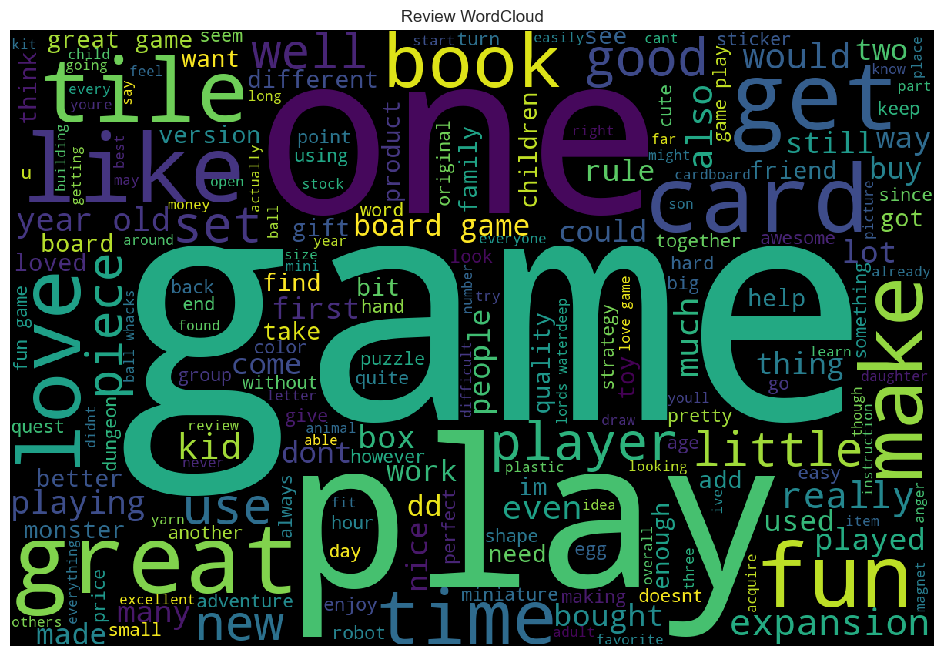

In [114]:
# Create a word cloud for 'review'
review_text = ' '.join(review_clean_list)
review_wordcloud = WordCloud(width=1200, height=800,
                             stopwords=english_stopwords).\
generate(review_text)

# Plot the WordCloud image for 'review'
plt.figure(figsize=(12, 8))
plt.imshow(review_wordcloud, interpolation='nearest')
plt.axis('off')
plt.title('Review WordCloud')
plt.show()

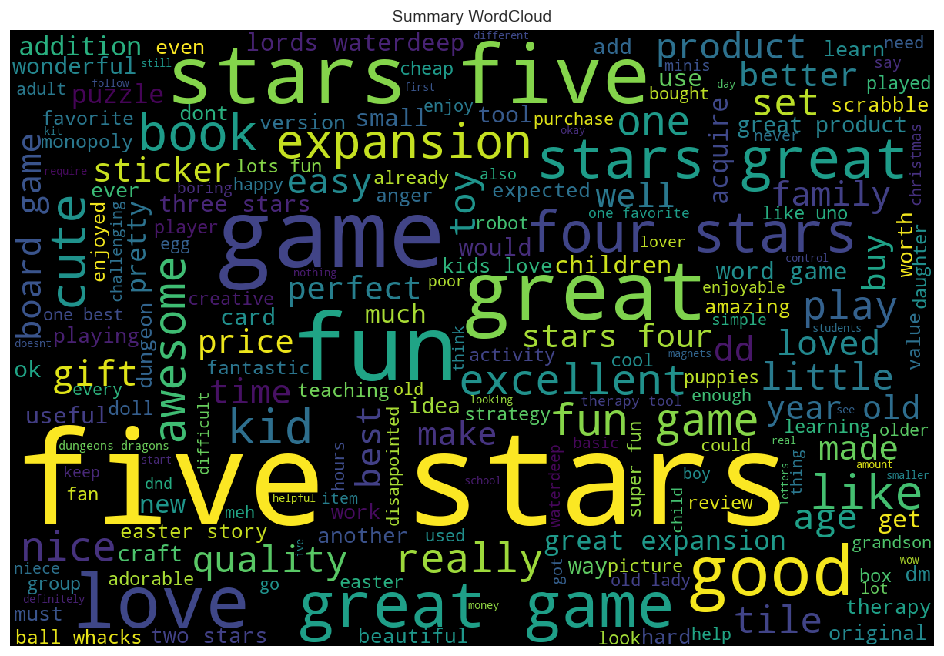

In [115]:
# Create a word cloud for 'summary'
summary_text = ' '.join(summary_clean_list)
summary_wordcloud = WordCloud(width=1200, height=800,
                              stopwords=english_stopwords).\
generate(summary_text)

# Plot the WordCloud image for 'summary'
plt.figure(figsize=(12, 8))
plt.imshow(summary_wordcloud, interpolation='nearest')
plt.axis('off')
plt.title('Summary WordCloud')
plt.show()

## 4. Frequency distribution and polarity


In [116]:
# Determine the frequency distribution
# Create frequency distributions
summary_fdist = nltk.FreqDist(summary_clean_list)
review_fdist = nltk.FreqDist(review_clean_list)

# Print the 15 most frequent words (summary)
print('Top 15 Most Frequent Words (Summary):')
print(summary_fdist.most_common(15))

# Print the 15 most frequent words (review)
print('Top 15 Most Frequent Words (Review):')
print(review_fdist.most_common(15))

Top 15 Most Frequent Words (Summary):
[('stars', 466), ('five', 381), ('game', 319), ('great', 295), ('fun', 218), ('love', 93), ('good', 92), ('four', 58), ('like', 54), ('expansion', 52), ('kids', 50), ('cute', 45), ('book', 43), ('one', 38), ('awesome', 36)]
Top 15 Most Frequent Words (Review):
[('game', 1685), ('great', 596), ('fun', 553), ('one', 530), ('play', 502), ('like', 414), ('love', 331), ('really', 319), ('get', 319), ('cards', 301), ('tiles', 297), ('good', 294), ('time', 291), ('would', 280), ('book', 273)]


In [139]:
summary_counts = pd.DataFrame(summary_fdist.most_common(15), columns=['Word', 'Count'])
review_counts = pd.DataFrame(review_fdist.most_common(15), columns=['Word', 'Count'])

[None]

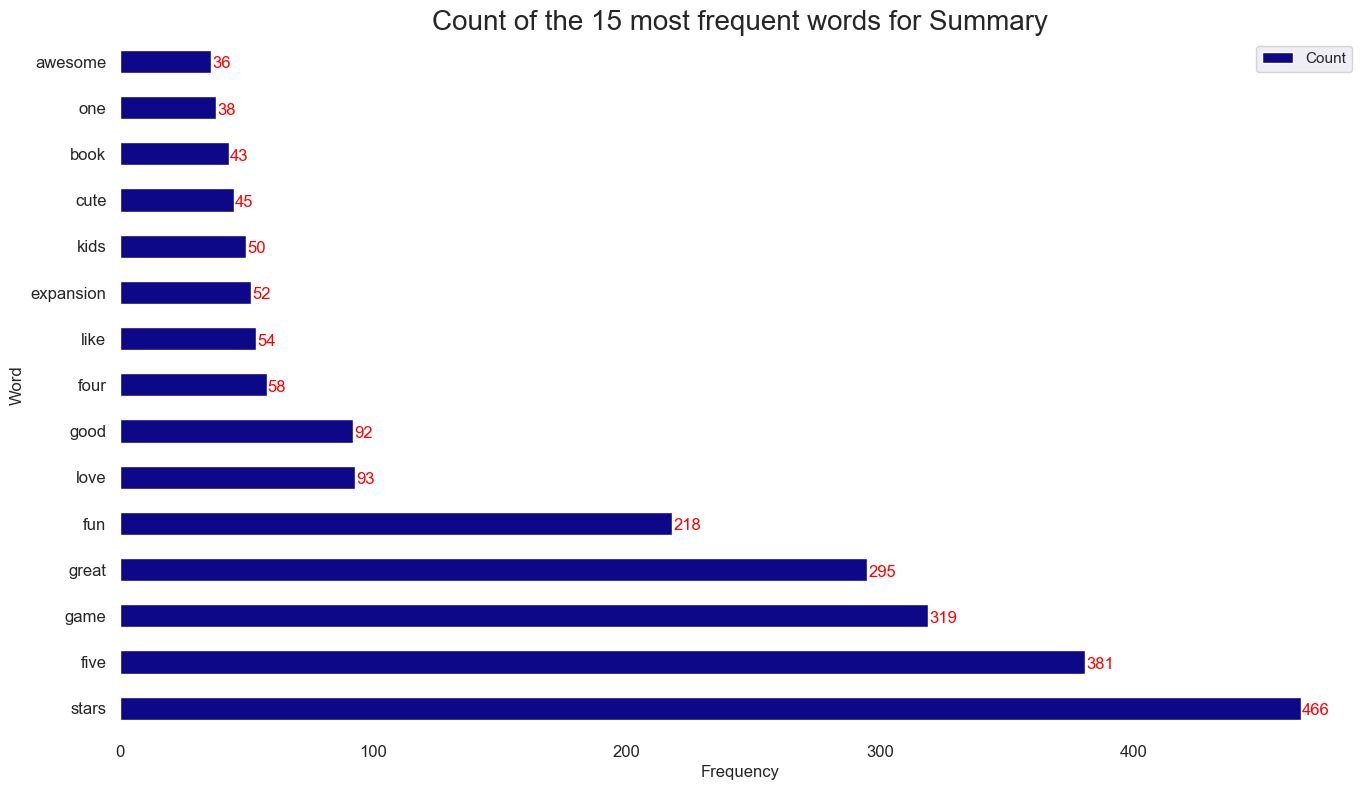

In [144]:
# Visualise the 15 most common words for 'summary'
# Set the plot types
ax = summary_counts.plot(kind='barh', figsize=(16, 9),
                         fontsize=12, colormap='plasma')

# Set the labels
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title('Count of the 15 most frequent words for Summary', fontsize=20)


# Draw the bar labels
for i in ax.patches:
    ax.text(
        i.get_width() + 0.41,
        i.get_y() + 0.1,
        str(round((i.get_width()), 2)),
        fontsize=12,
        color='red',)
words = list(summary_counts['Word'])
ax.set_yticks(np.arange(len(words)))
ax.set_yticklabels(words, fontsize=12)

# Specify background colour for the axis/plot
ax.set(facecolor='white')

[None]

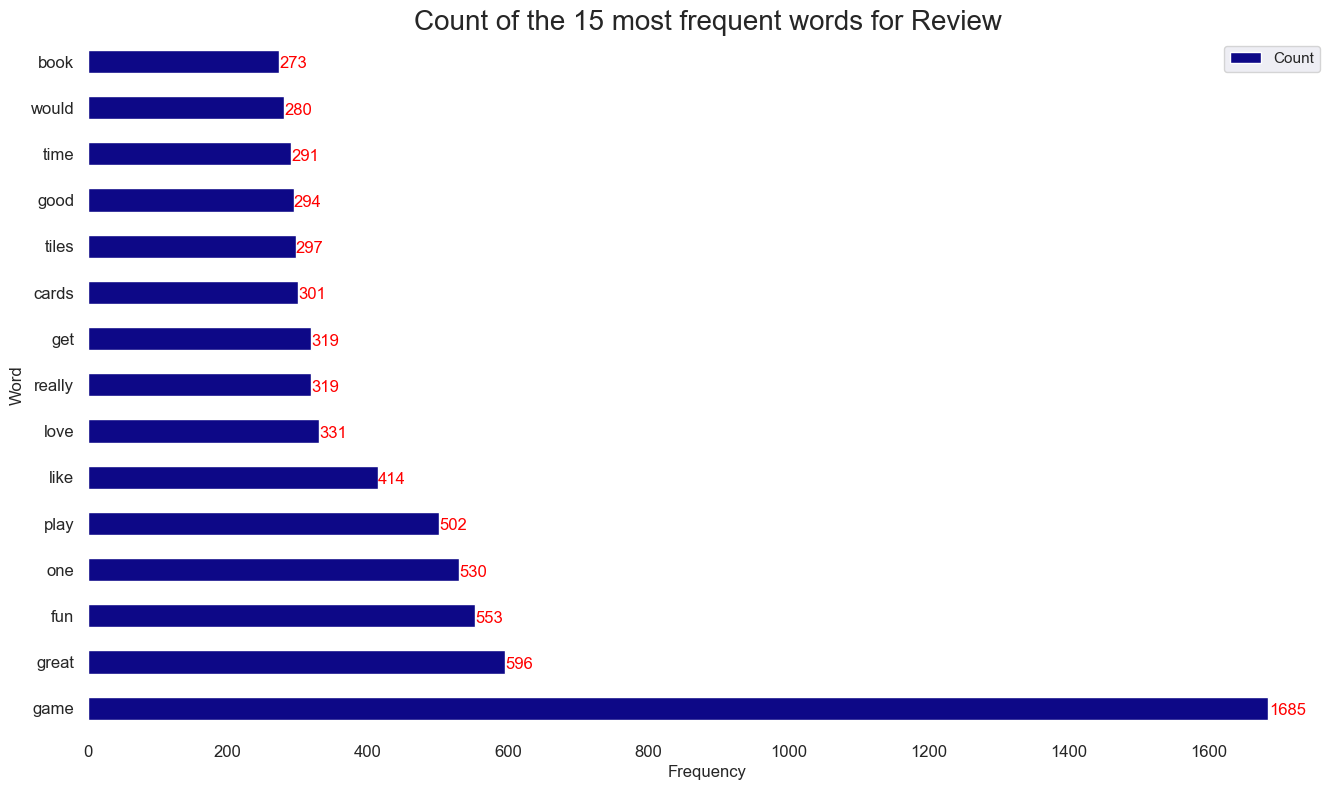

In [159]:
# Visualise the 15 most common words for 'review'
# Set the plot type
ax = review_counts.plot(kind='barh', figsize=(16, 9),
                         fontsize=12, colormap='plasma')

# Set the labels
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title('Count of the 15 most frequent words for Review', fontsize=20)


# Draw the bar labels
for i in ax.patches:
    ax.text(
        i.get_width() + 0.41,
        i.get_y() + 0.1,
        str(round((i.get_width()), 2)),
        fontsize=12,
        color='red',)
words = list(review_counts['Word'])
ax.set_yticks(np.arange(len(words)))
ax.set_yticklabels(words, fontsize=12)

# Specify background colour for the axis/plot
ax.set(facecolor='white')

### 4b) Remove alphanumeric characters and stopwords

In [160]:
# Define functions
def remove_emojis(text):
  """Removes emojis from text while preserving whitespace and other characters.

  Args:
      text: The text string to remove emojis from.

  Returns:
      The text string with emojis replaced by an empty string.
  """
  return emoji.demojize(text)

def replace_special_symbols(text):
  """Replaces special symbols with whitespace while preserving letters and numbers.

  Args:
      text: The text string to replace special symbols in.

  Returns:
      The text string with special symbols replaced by whitespace.
  """
  # Customise this pattern to include or exclude specific symbols as needed
  pattern = r"[^\w\s]"  # Matches anything except alphanumeric characters and whitespace
  return re.sub(pattern, " ", text)

# Apply the functions to your review and summary columns
turtle_nlp['review'] = turtle_nlp['review'].apply(remove_emojis)
turtle_nlp['review'] = turtle_nlp['review'].apply(replace_special_symbols)

turtle_nlp['summary'] = turtle_nlp['summary'].apply(remove_emojis)
turtle_nlp['summary'] = turtle_nlp['summary'].apply(replace_special_symbols)

# View the modified DataFrame
turtle_nlp.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  review_polarity  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4                                         money trap        -0.316667   

   review_subjectivity  summary_polarity  summary_subjectivity  
0             0.486111              0.15              0.500000  
1             0.442976             -0.80              0.900000  
2             0.430435              0.00              0.733333  
3             0.784848              0.00              0.000000  
4             0.316667              0.00              0.000000

In [ ]:
# Remove all the stopwords: already done in 'token' section

### 4c) Create wordcloud without stopwords

**Note:** Not repeating the WordClouds without StopWords here, as they are already 
in the 'token' section. <br> Since WordClouds have been created from filtered lists through comprehension
there are no StopWords present, <br> hence, repetition of WordClouds is not necessary here, but would instead constitute overcrowding.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) <br>and sentiment scores for the respective columns

In [161]:
# Define a function to generate polarity and sentiment scores
def generate_polarity_sentiment(text):
  """Extracts polarity (-1 to 1) and sentiment scores for text."""
  blob = TextBlob(text)
  return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to 'review' column
turtle_nlp[['review_polarity', 'review_subjectivity']] = turtle_nlp['review'].\
apply(lambda x: pd.Series(generate_polarity_sentiment(x)))

# Apply the function to 'summary' column
turtle_nlp[['summary_polarity', 'summary_subjectivity']] = turtle_nlp['summary'].\
apply(lambda x: pd.Series(generate_polarity_sentiment(x)))

In [162]:
# Check that function has been applied properly
turtle_nlp.head(15)

review  \
0   when it comes to a dms screen the space on the...   
1   an open letter to galeforce9 your unpainted mi...   
2   nice art nice printing why two panels are fill...   
3   amazing buy bought it as a gift for our new dm...   
4   as my review of gf9s previous screens these we...   
5                                      grandson loves   
6   i have bought many gm screens over the years b...   
7                           came in perfect condition   
8   could be better but its still great i love the...   
9   my review will mirror others in that this kind...   
10                                    works very well   
11                                cant wait to use it   
12  this is a campaign specific dm screen meant to...   
13  this is one of the worst games i have ever pla...   
14  it sounded like a really amazing concept but w...   

                                              summary  review_polarity  \
0   the fact that 50 of this space is wasted on ar...        -0.036111   
1   another worthless dungeon masters screen from ...         0.035952   
2                      pretty but also pretty useless         0.116640   
3                                          five stars         0.578788   
4                                          money trap        -0.316667   
5                                          five stars         0.000000   
6                                 best gm screen ever         0.660000   
7                                          five stars         1.000000   
8                      great but could be even better         0.372222   
9   another missed opportunity not a value add to ...         0.145537   
10                                         five stars         0.200000   
11                                       love the map         0.000000   
12                            not a general dm screen         0.070000   
13                                     very weak game        -0.040909   
14                               fell completely flat         0.040000   

    review_subjectivity  summary_polarity  summary_subjectivity  
0              0.486111           0.15000              0.500000  
1              0.442976          -0.80000              0.900000  
2              0.430435           0.00000              0.733333  
3              0.784848           0.00000              0.000000  
4              0.316667           0.00000              0.000000  
5              0.000000           0.00000              0.000000  
6              0.700000           1.00000              0.300000  
7              1.000000           0.00000              0.000000  
8              0.463889           0.65000              0.625000  
9              0.492162           0.00000              0.000000  
10             0.300000           0.00000              0.000000  
11             0.000000           0.50000              0.600000  
12             0.400000          -0.02500              0.500000  
13             0.628788          -0.44375              0.606250  
14             0.510455          -0.02500              0.125000

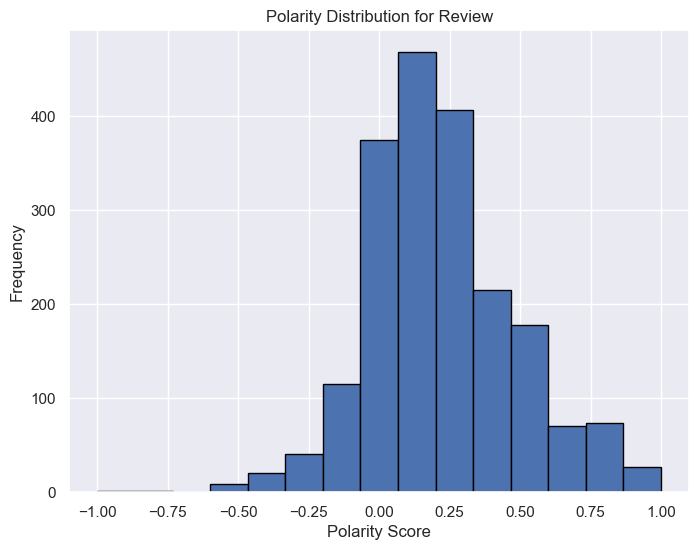

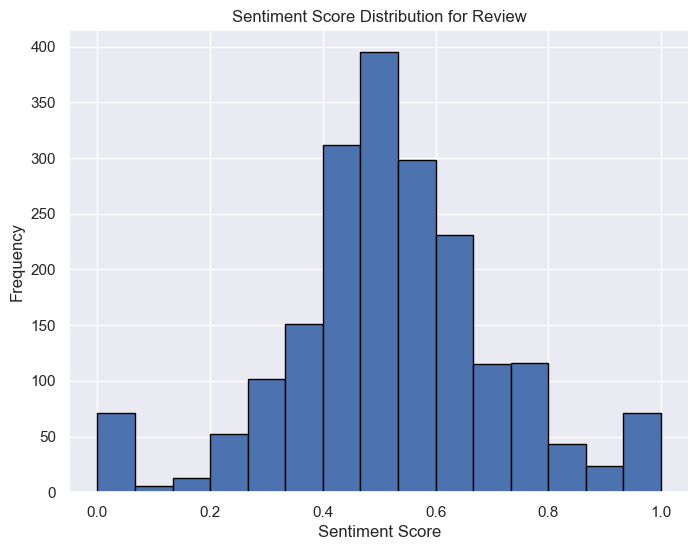

In [150]:
# Review: Create a histogram plot with bins = 15
# Histogram of polarity for Review
plt.figure(figsize=(8, 6))
plt.hist(turtle_nlp['review_polarity'],
         bins=15, edgecolor='black')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Polarity Distribution for Review')
plt.grid(True)
plt.show()

# Histogram of sentiment score for Review
plt.figure(figsize=(8, 6))
plt.hist(turtle_nlp['review_subjectivity'],
         bins=15, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution for Review')
plt.grid(True)
plt.show()

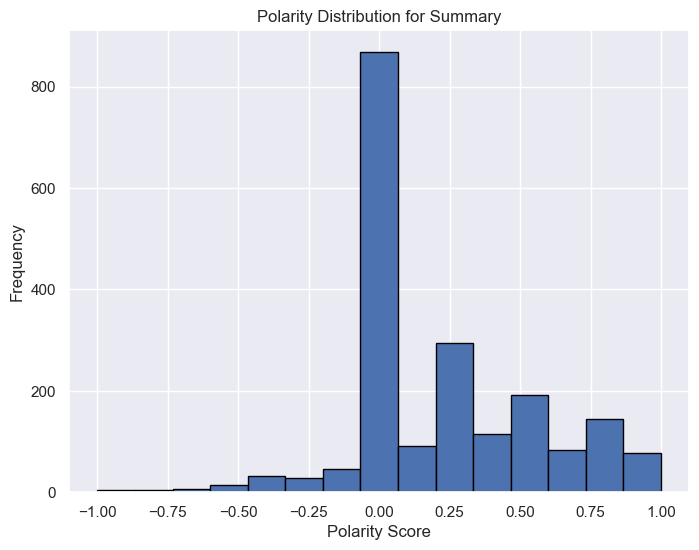

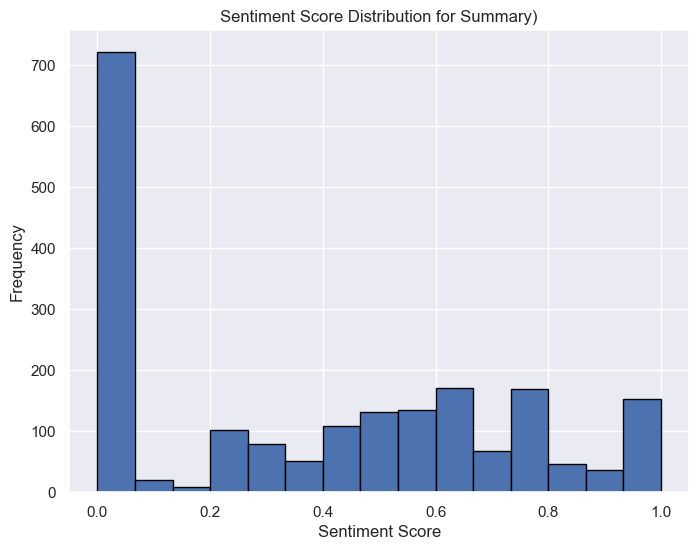

In [151]:
# Summary: Create a histogram plot with bins = 15
# Histogram of polarity for Summary
plt.figure(figsize=(8, 6))
plt.hist(turtle_nlp['summary_polarity'],
         bins=15, edgecolor='black')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Polarity Distribution for Summary')
plt.grid(True)
plt.show()

# Histogram of sentiment score for Summary
plt.figure(figsize=(8, 6))
plt.hist(turtle_nlp['summary_subjectivity'],
         bins=15, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution for Summary)')
plt.grid(True)
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [152]:
# Define a function to identify top positive/negative reviews/summaries
def get_top_polarity(data, column, n=20, is_positive=True):
  """Identifies top n positive/negative reviews/summaries based on polarity."""
  if is_positive:
    sorted_data = data.sort_values(column, ascending=False)
  else:
    sorted_data = data.sort_values(column, ascending=True)
  return sorted_data.head(n)

In [153]:
# Top 20 negative reviews
top_negative_reviews = get_top_polarity(turtle_nlp,
                                        'review_polarity',
                                        is_positive=False)
print('Top 20 Negative Reviews:')
print(top_negative_reviews[['review',
                            'review_polarity']])

Top 20 Negative Reviews:
                                                 review  review_polarity
208   booo unles you are patient know how to measure...        -1.000000
182                   incomplete kit very disappointing        -0.780000
1804  im sorry i just find this product to be boring...        -0.583333
364   one of my staff will be using this game soon s...        -0.550000
230                    i found the directions difficult        -0.500000
117   i bought this as a christmas gift for my grand...        -0.500000
301                                           difficult        -0.500000
1524                         expensive for what you get        -0.500000
227   this was a gift for my daughter i found it dif...        -0.500000
290              instructions are complicated to follow        -0.500000
174   i sent this product to my granddaughter the po...        -0.491667
347   my 8 yearold granddaughter and i were very fru...        -0.446250
538   i purchased this on 

In [154]:
# Top 20 negative summaries
top_negative_summaries = get_top_polarity(turtle_nlp,
                                          'summary_polarity',
                                          is_positive=False)
print('Top 20 Negative Summaries:')
print(top_negative_summaries[['summary',
                              'summary_polarity']])

Top 20 Negative Summaries:
                                                summary  summary_polarity
21                        the worst value ive ever seen         -1.000000
208    boring unless you are a craft person which i am          -1.000000
829                                              boring         -1.000000
1166  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
1620                                       disappointed         -0.750000
144                                        disappointed         -0.750000
793                                        disappointed         -0.750000
631                                        disappointed         -0.750000
363   promotes anger instead of teaching calming met...         -0.700000
890                        bad qualityall made of paper         -0.700000
885            too bad this is not what i was expecting         -0.700000
178     at 

In [155]:
# Top 20 positive reviews
top_positive_reviews = get_top_polarity(turtle_nlp,
                                        'review_polarity',
                                        is_positive=True)
print('Top 20 Positive Reviews:')
print(top_positive_reviews[['review',
                            'review_polarity']])

Top 20 Positive Reviews:
                                                 review  review_polarity
1168               best set buy 2 if you have the means              1.0
1401  one of the best board games i played in along ...              1.0
1967       perfect for tutoring my grandson in spelling              1.0
621   wonderful for my grandson to learn the resurre...              1.0
1720  it is the best thing to play with and also min...              1.0
609                                  delightful product              1.0
591                                   wonderful product              1.0
496   excellent activity for teaching selfmanagement...              1.0
194                                        awesome gift              1.0
1301                                        its awesome              1.0
1037                                            awesome              1.0
1550  my daughter loves her stickers awesome seller ...              1.0
1135                      

In [156]:
# Top 20 positive summaries
top_positive_summaries = get_top_polarity(turtle_nlp,
                                          'summary_polarity',
                                          is_positive=True)
print('Top 20 Positive Summaries:')
print(top_positive_summaries[['summary',
                              'summary_polarity']])

Top 20 Positive Summaries:
                                                summary  summary_polarity
1417                                      wonderful and               1.0
1427                                excellent expansion               1.0
580   the pigeon is the perfect addition to a school...               1.0
815                          one of the best games ever               1.0
1656                       a wonderful reading resource               1.0
475                                           excellent               1.0
1094  excellent product and everything i wanted it t...               1.0
1649        wonderful telling of a heart wrenching tale               1.0
1093                                            awesome               1.0
418                                             perfect               1.0
80    theyre the perfect size to keep in the car or ...               1.0
1083                               best dungeon crawler               1.0
1078       

## 7. Discuss: Insights and observations

### Marketing Implications

**Focus on positive aspects** 
* The most frequent words in reviews and summaries include 'game', 'great', 'fun', 'love', 'stars',<br> indicating overall positive sentiment towards the games. 
* Marketing campaigns can highlight these aspects and showcase positive customer experiences.

**Identify target audience**
* Words like 'kids', 'cute', 'book' suggest a customer segment interested in educational or creative games.<br> Also indicates that people might be buying the games for children in their life.
* Marketing efforts can target these demographics.

**Address negative feedback**
* Negative reviews mention issues like 'difficult', 'disappointed', 'expensive'.<br> Customer service can address these concerns, and product development can focus on improvements.

**Product descriptions**
* Use keywords identified from the analysis to tailor product descriptions <br> to better match customer search queries and expectations.

**Rich content**
* Consider creating blog posts or social media content that uses the sentiment analysis findings <br> to inform the narrative.

**A/B testing**
* When creating marketing materials or website content, test variations that incorporate these <br> insights against controls to measure effectiveness.

By understanding customer sentiment and the language they use in reviews, <br> Turtle Games can develop more targeted marketing campaigns, improve customer satisfaction,<br> and potentially identify areas for product development.

# 